In [1]:
import torch
import numpy as np

In [9]:
#array与tensor之间转换
np_data=np.arange(6).reshape((2,3))
torch_data=torch.from_numpy(np_data)
tensor2array=torch_data.numpy()
print(np_data)
print(torch_data)
print(tensor2array)

[[0 1 2]
 [3 4 5]]
tensor([[0, 1, 2],
        [3, 4, 5]], dtype=torch.int32)
[[0 1 2]
 [3 4 5]]


In [17]:
#运算符类比numpy
data=[[1,2],[3,4]]
tensor=torch.FloatTensor(data)
data=np.array(data)
print(data.dot(data))
print(torch.mm(tensor,tensor))

[[ 7 10]
 [15 22]]
tensor([[ 7., 10.],
        [15., 22.]])


In [31]:
a=np.array([1,2,3])
b=torch.from_numpy(a)
print(b[0])
print(torch.linspace(0,10,steps=5))
print(torch.logspace(start=1,end=2,steps=5))

tensor(1, dtype=torch.int32)
tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])
tensor([ 10.0000,  17.7828,  31.6228,  56.2341, 100.0000])


In [42]:
print(torch.eye(3))
print(torch.ones(2,3))
print(torch.zeros(2,3))
print(torch.rand(2,3))#（0，1）
print(torch.randn(2,3))#正态
print(torch.arange(1,4,0.5))

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[0.9223, 0.1266, 0.7609],
        [0.7384, 0.7815, 0.5195]])
tensor([[-0.1892,  1.4259,  0.2222],
        [ 0.1847,  0.0374, -0.2538]])
tensor([1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000])


In [69]:
import torch
from torch.autograd import Variable

tensor=torch.Tensor([[1,2],[3,4]])
variable=Variable(tensor,requires_grad=True)
tensor.requires_grad=True

t_out=torch.mean(tensor*tensor)

v_out=torch.mean(variable*variable)
print(t_out)
t_out.backward()
print(variable.data.numpy())
print(tensor.grad)

tensor(7.5000, grad_fn=<MeanBackward0>)
[[1. 2.]
 [3. 4.]]
tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])


D:\Anaconda\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
D:\Anaconda\lib\site-packages\torch\nn\functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


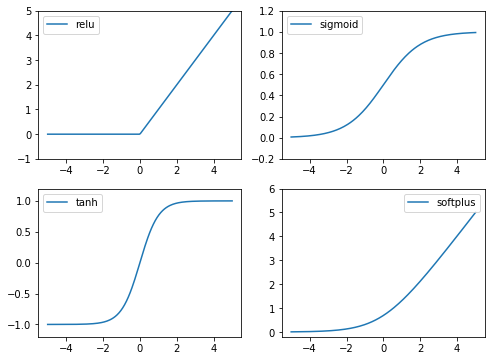

In [69]:
#激励函
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

x=torch.linspace(-5,5,200)
x=Variable(x)
x_np=x.data.numpy()

y_relu=F.relu(x).data.numpy()
y_sigmoid=F.sigmoid(x).data.numpy()
y_tanh=F.tanh(x).data.numpy()
y_softplus=F.softplus(x).data.numpy()

plt.figure(1,figsize=(8,6))

plt.subplot(221)
plt.plot(x_np,y_relu,label='relu')
plt.ylim(-1,5)
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np,y_sigmoid,label='sigmoid')
plt.ylim(-0.2,1.2)
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np,y_tanh,label='tanh')
plt.ylim(-1.2,1.2)
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np,y_softplus,label='softplus')
plt.ylim(-0.2,6)
plt.legend(loc='best')

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


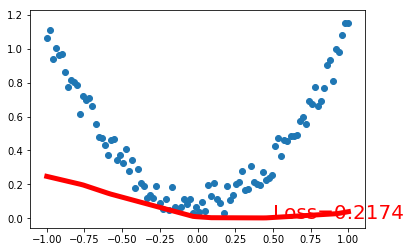

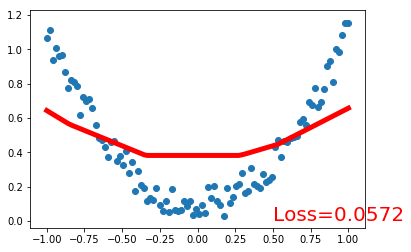

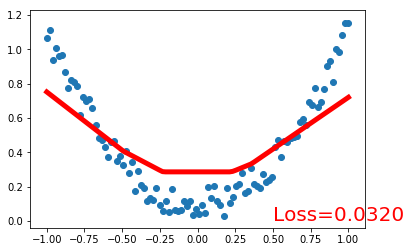

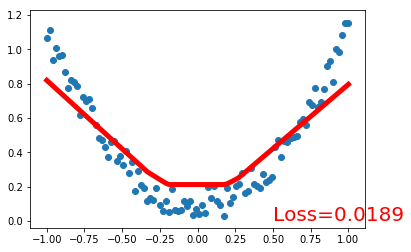

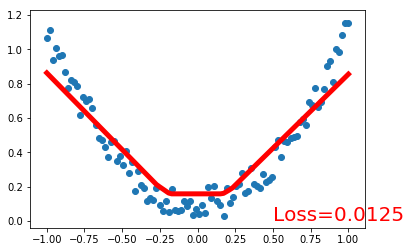

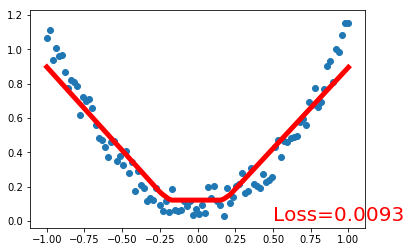

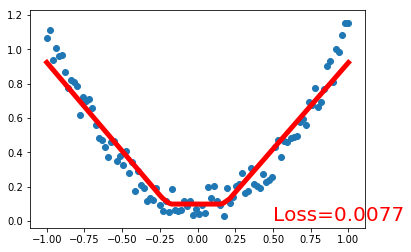

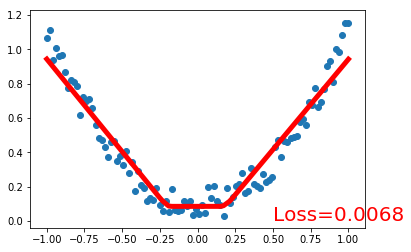

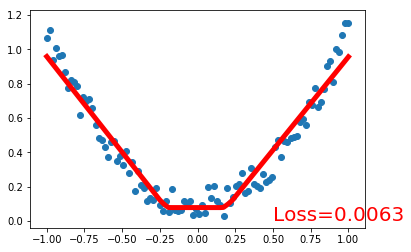

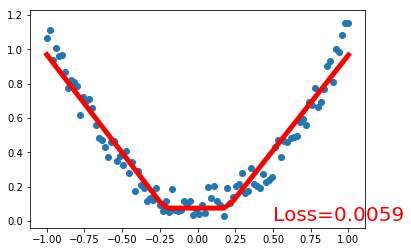

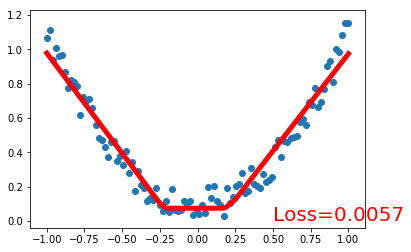

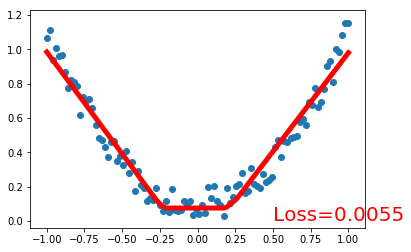

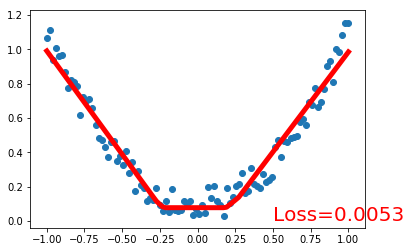

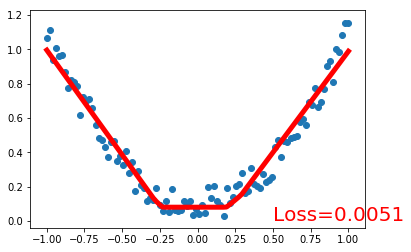

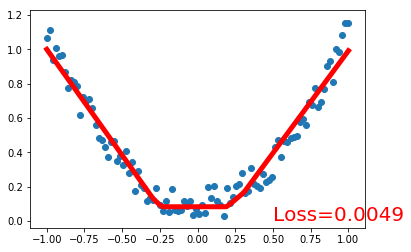

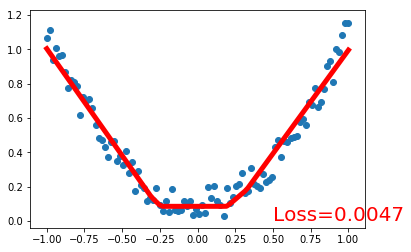

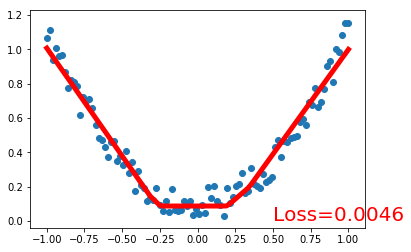

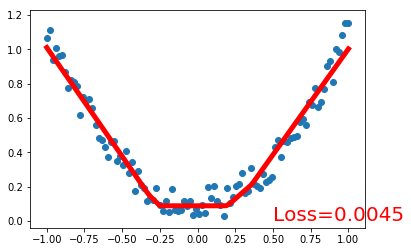

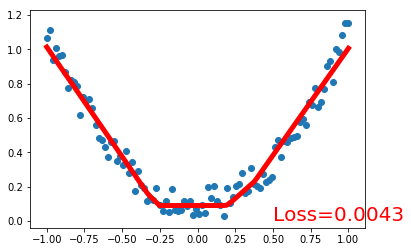

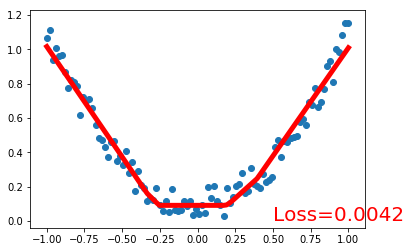

In [86]:
#回归
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1)#改变维度，[100,1]
y=x.pow(2)+0.2*torch.rand(x.size())
x,y=Variable(x),Variable(y)

#打印散点图
#plt.scatter(x.data.numpy(),y.data.numpy())
#plt.show()

class Net(torch.nn.Module):
    
    def __init__(self,n_features,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(n_features,n_hidden)
        self.predict=torch.nn.Linear(n_hidden,n_output)
        
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=self.predict(x)
        return x
    
net=Net(1,10,1)
print(net)
plt.ion()
plt.show()

optimizer=torch.optim.SGD(net.parameters(),lr=0.5)
loss_func=torch.nn.MSELoss()

for t in range(100):
    prediction=net(x)
    loss=loss_func(prediction,y)
    
    optimizer.zero_grad()#梯度归零，避免下一次训练叠加
    loss.backward()#反向传递
    optimizer.step()#以0.5的LR进行优化
    if t%5==0:
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        
plt.ioff()
plt.show()
    

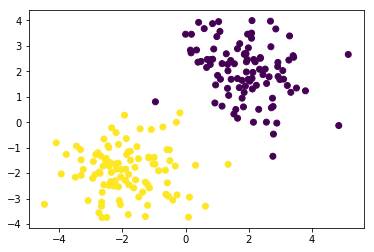

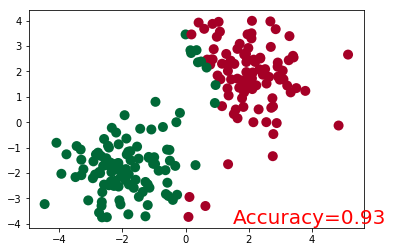

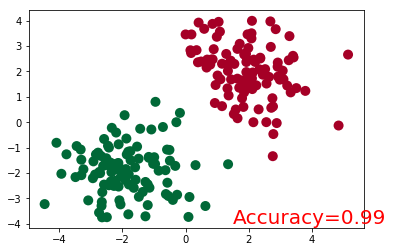

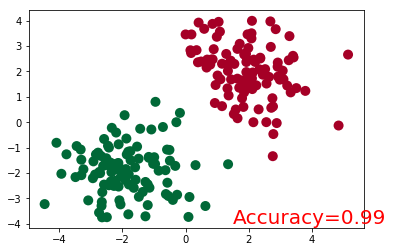

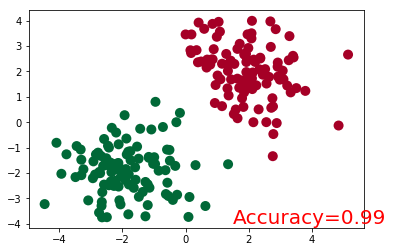

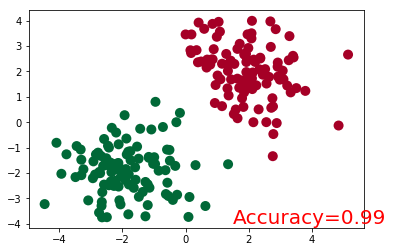

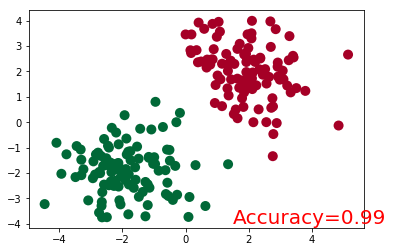

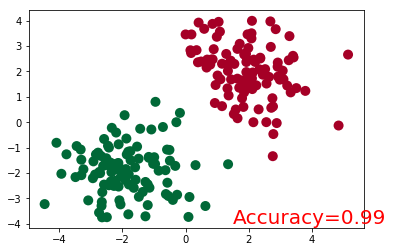

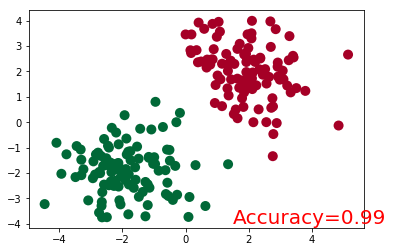

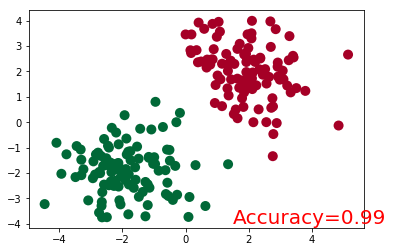

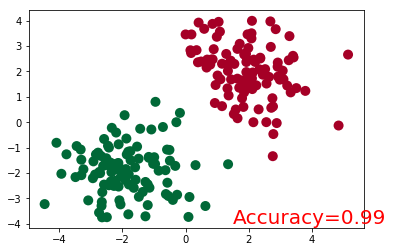

In [105]:
#分类
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

n_data=torch.ones(100,2)
x0=torch.normal(2*n_data,1)#torch.normal(means, std)均值标准差
y0=torch.zeros(100)
x1=torch.normal(-2*n_data,1)
y1=torch.ones(100)
x=torch.cat((x0,x1),0).type(torch.FloatTensor)
y=torch.cat((y0,y1)).type(torch.LongTensor)
x,y=Variable(x),Variable(y)

plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=y.data.numpy())
plt.show()

class Net(torch.nn.Module):
    
    def __init__(self,n_features,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(n_features,n_hidden)
        self.predict=torch.nn.Linear(n_hidden,n_output)
        
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=self.predict(x)
        return x
    
net=Net(2,10,2)    
plt.ion()
plt.show()

optimizer=torch.optim.SGD(net.parameters(),lr=0.02)
loss_func=torch.nn.CrossEntropyLoss()

for t in range(100):
    out=net(x)
    loss=loss_func(out,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t%10==0:
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
                     
plt.ioff()
plt.show()

        

In [7]:
#快速搭建
import torch
import torch.nn.functional as F

#method1
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(n_feature,n_hidden)
        self.predict=torch.nn.Linear(n_hidden,n_output)
    
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=self.predict(x)
        return x

net1=Net(1,10,1)

#method2
net2=torch.nn.Sequential(
    torch.nn.Linear(1,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,1))

print(net1)
print(net2)
            

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


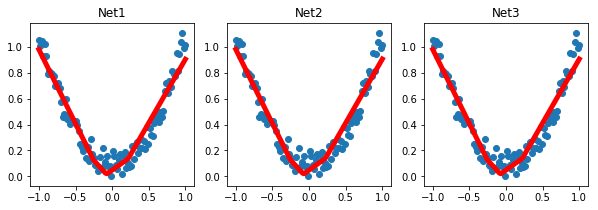

In [61]:
#保存提取
import torch 
from torch.autograd import Variable
import matplotlib.pyplot as plt

x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1)#shape 100,1
y=x.pow(2)+0.2*torch.rand(x.size())
x,y=Variable(x),Variable(y)

def save():
    net1=torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1)
    )
    optimizer=torch.optim.SGD(net1.parameters(),lr=0.5)
    loss_func=torch.nn.MSELoss()
    
    for t in range(100):
        prediction=net1(x)
        loss=loss_func(prediction,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
   
    # 2 save methods 
    torch.save(net1,'net.pkl')#save entie net
    torch.save(net1.state_dict(),'net_params.pkl')#save only params

def restore_net():
    #restore entire net
    net2=torch.load('net.pkl')
    prediction=net2(x)
    
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    
def restore_params():
    #restore only params
    net3=torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1))
    
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction=net3(x)
    
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()
    
save()
restore_net()
restore_params()

In [32]:
#批训练
import torch
import torch.utils.data as Data

BATCH_SIZE=8

x=torch.linspace(1,10,10)
y=torch.linspace(10,1,10)

torch_dataset=Data.TensorDataset(x,y)
loader=Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2)

for epoch in range(3):
    for step,(batch_x,batch_y)in enumerate(loader):#enumerate每次加索引
        print('Epoch:',epoch,'|Step:',step,'|batch_x:',batch_x.numpy(),'|batch_y:',batch_y.numpy())
        

Epoch: 0 |Step: 0 |batch_x: [ 5.  8.  6.  4.  2. 10.  1.  3.] |batch_y: [ 6.  3.  5.  7.  9.  1. 10.  8.]
Epoch: 0 |Step: 1 |batch_x: [9. 7.] |batch_y: [2. 4.]
Epoch: 1 |Step: 0 |batch_x: [8. 9. 4. 1. 6. 5. 2. 3.] |batch_y: [ 3.  2.  7. 10.  5.  6.  9.  8.]
Epoch: 1 |Step: 1 |batch_x: [ 7. 10.] |batch_y: [4. 1.]
Epoch: 2 |Step: 0 |batch_x: [7. 8. 1. 2. 5. 4. 9. 3.] |batch_y: [ 4.  3. 10.  9.  6.  7.  2.  8.]
Epoch: 2 |Step: 1 |batch_x: [10.  6.] |batch_y: [1. 5.]


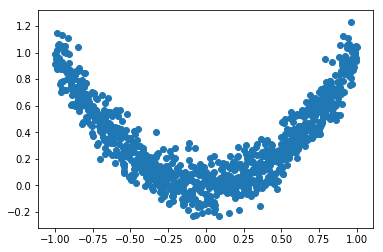

EPOCH: 0
EPOCH: 1
EPOCH: 2
EPOCH: 3
EPOCH: 4
EPOCH: 5
EPOCH: 6
EPOCH: 7
EPOCH: 8
EPOCH: 9
EPOCH: 10
EPOCH: 11


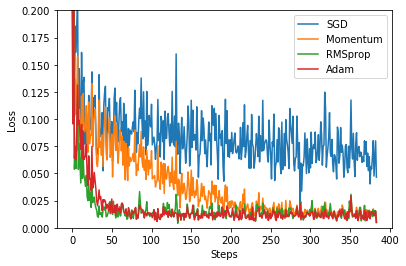

In [59]:
#optimizer优化器
import torch
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

LR=0.01
BATCH_SIZE=32
EPOCH=12

x=torch.unsqueeze(torch.linspace(-1,1,1000),1)
y=x.pow(2)+0.1*torch.normal(torch.zeros(*x.size()))#*后面加tensor

plt.scatter(x.numpy(),y.numpy())
plt.show()

torch_dataset=Data.TensorDataset(x,y)
loader=Data.DataLoader(dataset=torch_dataset,batch_size=BATCH_SIZE,shuffle=True,num_workers=2)

class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(1,20)
        self.predict=torch.nn.Linear(20,1)
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=self.predict(x)
        return x
    
#4 kinds optimizers
net_SGD=Net()
net_Momentum=Net()
net_RMSprop=Net()
net_Adam=Net()
nets=[net_SGD,net_Momentum,net_RMSprop,net_Adam]

opt_SGD=torch.optim.SGD(net_SGD.parameters(),lr=LR)
opt_Momentum=torch.optim.SGD(net_Momentum.parameters(),lr=LR,momentum=0.8)
opt_RMSprop=torch.optim.RMSprop(net_RMSprop.parameters(),lr=LR,alpha=0.9)
opt_Adam=torch.optim.Adam(net_Adam.parameters(),lr=LR,betas=(0.9,0.99))
optimizers=[opt_SGD,opt_Momentum,opt_RMSprop,opt_Adam]
        
loss_func=torch.nn.MSELoss()
losses_his=[[],[],[],[]]

#start training
for epoch in range(EPOCH):
    print('EPOCH:',epoch)
    for step,(b_x,b_y)in enumerate(loader):
        for net,opt,l_his in zip(nets,optimizers,losses_his):#zip可以for多个
            b_x,b_y=Variable(b_x),Variable(b_y)
            output=net(b_x)
            loss=loss_func(output,b_y)
            opt.zero_grad()#梯度清零，否则下次训练会叠加
            loss.backward()
            opt.step()#反向传播后应用梯度
            l_his.append(loss.data.numpy())#记录loss
            
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
        plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()

D:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])


D:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


torch.Size([60000])


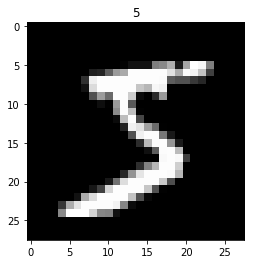

D:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:35: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
D:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6])
CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)
tensor([[-0.0157,  0.0253,  0.0029,  ..., -0.0337,  0.0101,  0.0210],
        [-0.0182,  0.0183, -0.0174,  ..., -0.0453, -0.0318,  0.0779],
        [ 0.0010,  0.0277, -0.0041,  ..., -0.0302, -0.0178,  0.0418],
        ...,
        [-0.0027, -0.0088,  0.0029,  ..., -0.0782, -0.0041,  0.0768],
        [ 0.0039,  0.0044,  0.0380,  ..., -0.0891,  0.0106,  0.0265],
        [-0.0180,  0.0105,  0.0047,  ..., -0.0753, -0.0045,  0.1143]],
       grad_fn=<AddmmBackward>)
torch.Size([2000,

In [63]:
#cnn
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
from torch.autograd import Variable
import matplotlib.pyplot as plt
import os

EPOCH=1
BATCH_SIZE=50
LR=0.001
DOWNLOAD_MNIST=False

if not(os.path.exists('./mnist'))or not os.listdir('./mnist'):
    #不存在minist或者mnist是空的
    DOWNLOAD_MNIST=True

train_data=torchvision.datasets.MNIST(
    root='./mnist',
    train=True,#表示trainning data,6w个
    transform=torchvision.transforms.ToTensor(),#转换为tensor，并且像素点正则化到(0，1)
    download=DOWNLOAD_MNIST
    )
print(train_data.train_data.size())                 # (60000, 28, 28)
print(train_data.train_labels.size())               # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

train_loader=Data.DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
#每个mini-batch，image batch的shape为（50，1，28，28）

test_data=torchvision.datasets.MNIST(root='./mnist',train=False)
test_x=Variable(torch.unsqueeze(test_data.test_data,dim=1).type(torch.FloatTensor),volatile=True)[:2000]/255
 # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y=test_data.test_labels[:2000]
print(test_y[:12])

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1=nn.Sequential(
            nn.Conv2d(
                in_channels=1,#（1，28，28）
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2 #padding=(kernel_size-1)/2 if stride=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)#（16，14，14）
        )
        self.conv2=nn.Sequential(
            nn.Conv2d(16,32,5,1,2),
            nn.ReLU(),
            nn.MaxPool2d(2)#（32，7，7）
        )
        self.out=nn.Linear(32*7*7,10)#全连接层, 10个分类
        
    def forward(self,x):
        x=self.conv1(x)
        x=self.conv2(x)#（batch,32，7，7)
        x=x.view(x.size(0),-1)#size(0)保留batch,-1改编为32*7*7 #（batch,32*7*7)
        output=self.out(x)#32*7*7的输入，10的输出
        return output #x为了可视化，否则只output即可

cnn=CNN()
print(cnn)
print(cnn(test_x))
print(cnn(test_x).size())

optimizer=torch.optim.Adam(cnn.parameters(),lr=LR)
loss_func=nn.CrossEntropyLoss()



for epoch in range(EPOCH):
    for step ,(b_x,b_y)in enumerate(train_loader):
        b_x,b_y=Variable(b_x),Variable(b_y)
        output=cnn(b_x)
        loss=loss_func(output,b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step%50==0:#每50步打印一次
            test_output=cnn(test_x)
            pred_y=torch.max(test_output,1)[1].data.numpy()
            accuracy=float((pred_y==test_y.data.numpy()).astype(int).sum())/float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)
           

        
test_output= cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')


In [64]:
#RNN分类,LSTM
import torch
from torch import nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.autograd import Variable

EPOCH=1
BATCH_SIZE=64
TIME_STEP=28     #RNN time step/image height,从上到下一行行扫像素点
INPUT_SIZE=28    #RNN input size/image width
LR=0.01
DOWNLOAD_MNIST=True

train_data=dsets.MNIST(root='./mnist',train=True,transform=transforms.ToTensor(),download=DOWNLOAD_MNIST)
train_loader=torch.utils.data.DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True,)

test_data=dsets.MNIST(root='./mnist',train=False,transform=transforms.ToTensor())
test_x=Variable(test_data.test_data,volatile=True).type(torch.FloatTensor)[:2000]/255
test_y=test_data.test_labels.numpy()[:2000]


class RNN(nn.Module):
    def __init__(self):
        super(RNN,self).__init__()
        
        self.rnn=nn.LSTM(
            input_size=INPUT_SIZE,
            hidden_size=64,    #RNN hidden units
            num_layers=1,       #RNN layer
            batch_first=True  #input,output会带上batch作为第一维度 (batch, time_step, input_size)            
        )
        
        self.out=nn.Linear(64,10)
        
    def forward(self,x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size/hidden_size)
        # h_n，h_c shape (n_layers, batch, hidden_size)为长短期记忆的分线和主线的hidden state
       
        r_out,(h_n,h_c)=self.rnn(x,None)#none代表没有初始的hidden state
        out=self.out(r_out[:,-1,:])#要最后一个time step的输出
        return out

rnn=RNN()
print(test_x.size())
print(rnn(test_x[:2]))


optimizer=torch.optim.Adam(rnn.parameters(),lr=LR)
loss_func=nn.CrossEntropyLoss()

for epoch in range(EPOCH):
    for step,(b_x,b_y)in enumerate(train_loader):
        b_x=Variable(b_x.view(-1,28,28))#(64,1,28,28)-->(64,28,28)前面乘一起
        b_y=Variable(b_y)
        output=rnn(b_x)
        loss=loss_func(output,b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 50 == 0:
            test_output = rnn(test_x)                   # (samples, time_step, input_size)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y).astype(int).sum()) / float(test_y.size)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)


test_output = rnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

D:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
D:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


torch.Size([2000, 28, 28])
tensor([[ 0.1475, -0.0569,  0.0371, -0.0827,  0.0705, -0.0984,  0.0023, -0.1116,
         -0.1192,  0.0205],
        [ 0.1388, -0.0562,  0.0487, -0.0927,  0.0671, -0.0964,  0.0102, -0.1187,
         -0.1126,  0.0151]], grad_fn=<AddmmBackward>)
Epoch:  0 | train loss: 2.3095 | test accuracy: 0.09
Epoch:  0 | train loss: 1.3462 | test accuracy: 0.54
Epoch:  0 | train loss: 0.9422 | test accuracy: 0.69
Epoch:  0 | train loss: 0.6573 | test accuracy: 0.79
Epoch:  0 | train loss: 0.5306 | test accuracy: 0.87
Epoch:  0 | train loss: 0.1367 | test accuracy: 0.87
Epoch:  0 | train loss: 0.3557 | test accuracy: 0.89
Epoch:  0 | train loss: 0.1457 | test accuracy: 0.92
Epoch:  0 | train loss: 0.3693 | test accuracy: 0.91
Epoch:  0 | train loss: 0.2036 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2012 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0743 | test accuracy: 0.93
Epoch:  0 | train loss: 0.2326 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2452 | test ac

In [72]:
a=torch.tensor([[1,5],[3,2]])
print(a.size())
print(torch.max(a,1))
print(torch.max(a,1)[1])
b=a.view(-1,4)
print(b)

torch.Size([2, 2])
torch.return_types.max(
values=tensor([5, 3]),
indices=tensor([1, 0]))
tensor([1, 0])
tensor([[1, 5, 3, 2]])


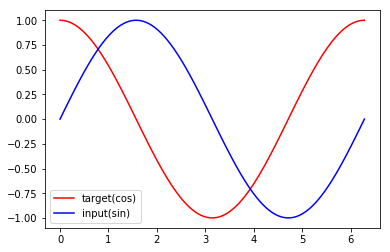

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


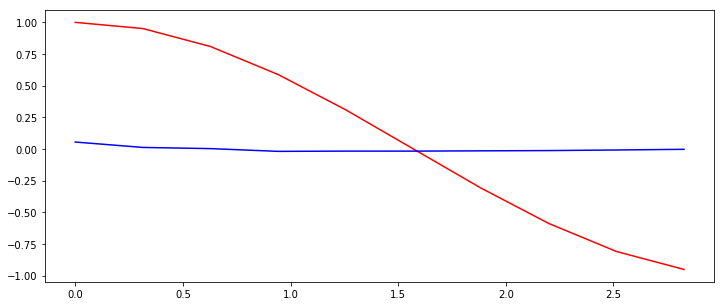

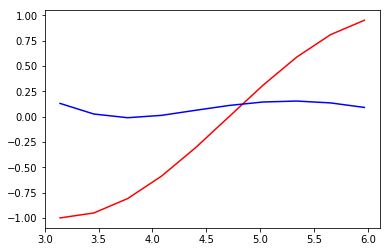

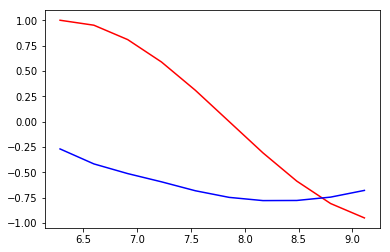

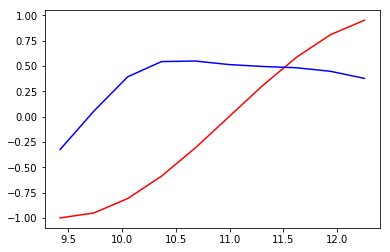

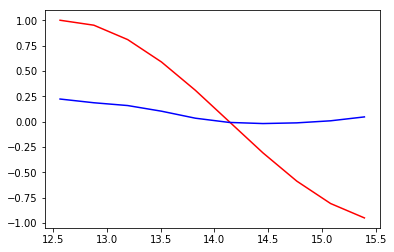

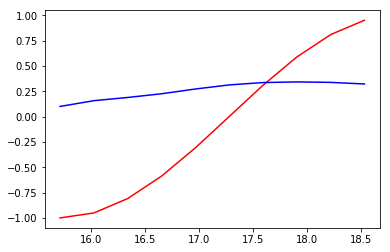

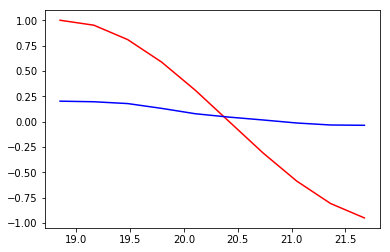

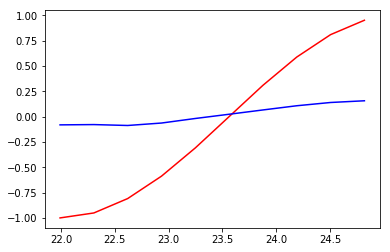

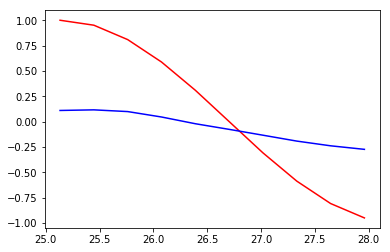

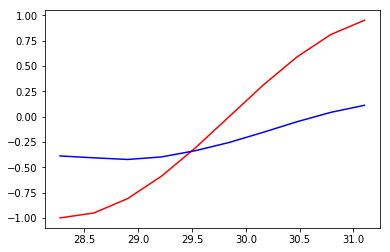

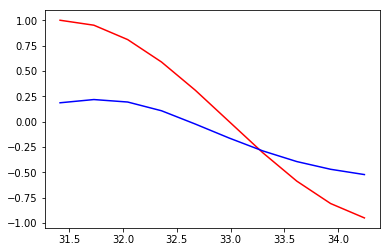

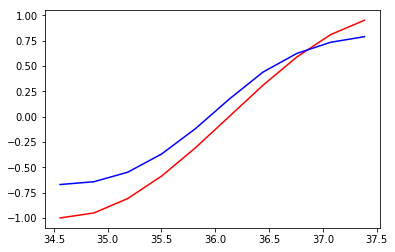

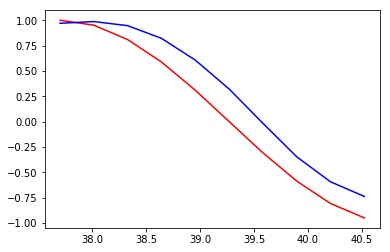

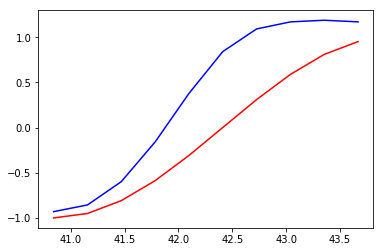

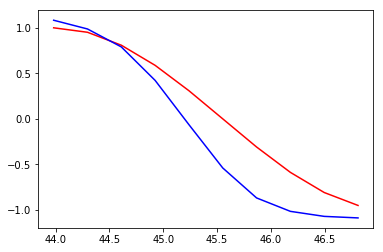

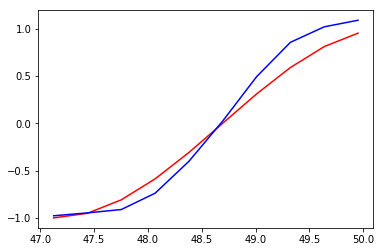

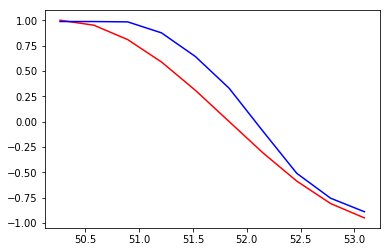

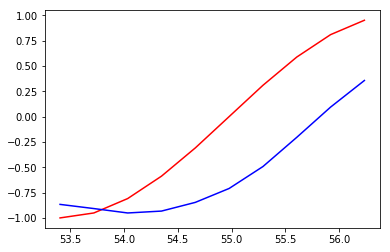

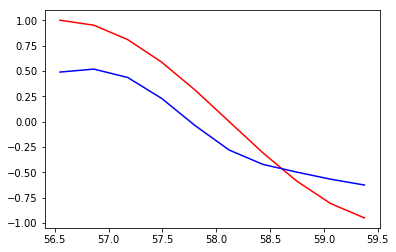

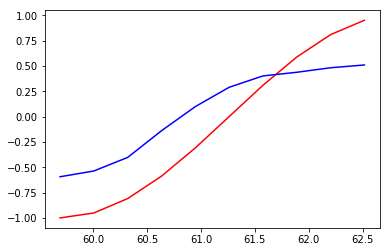

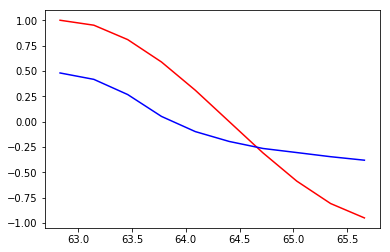

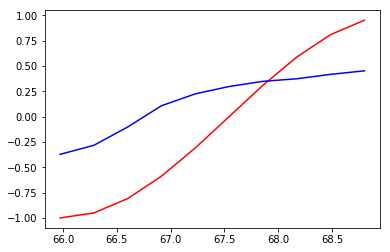

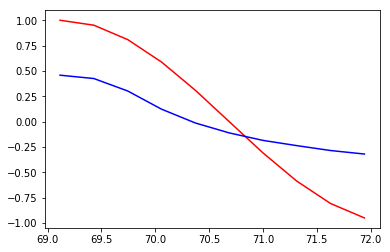

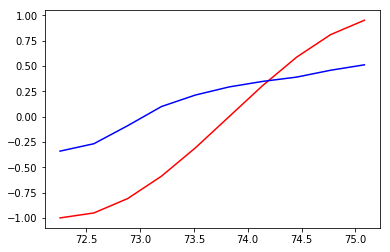

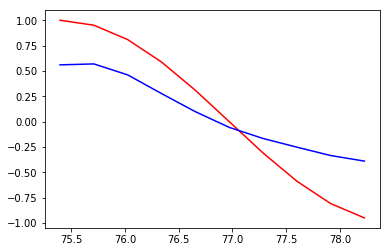

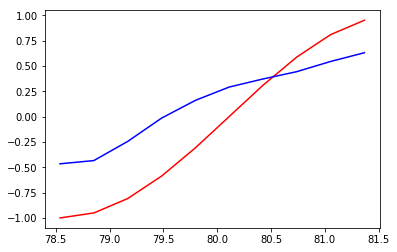

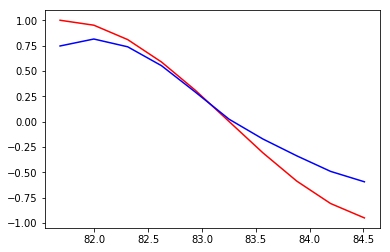

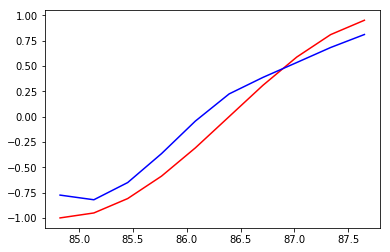

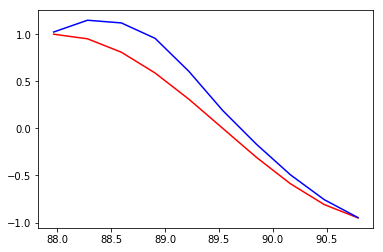

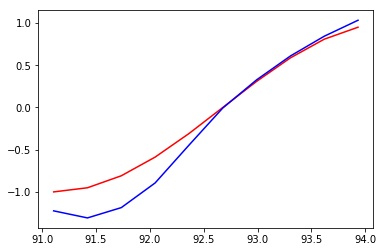

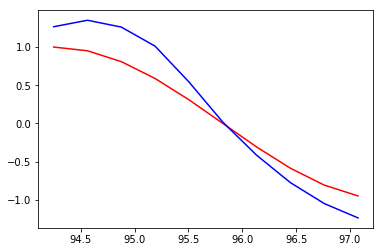

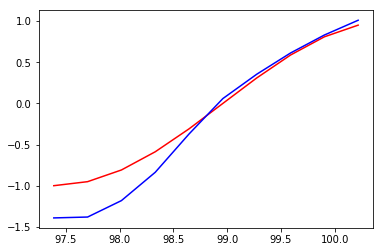

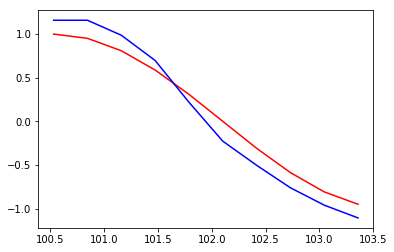

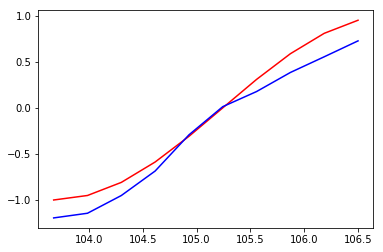

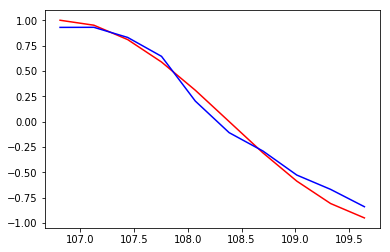

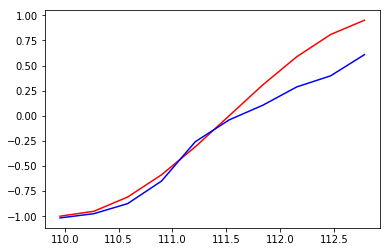

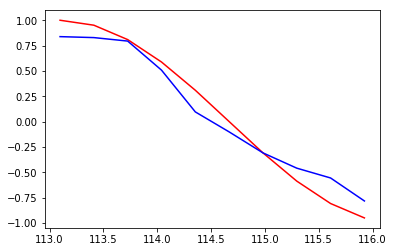

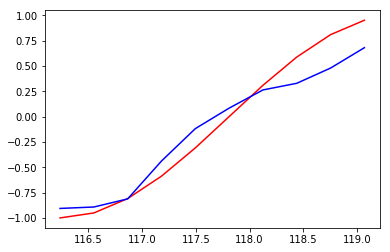

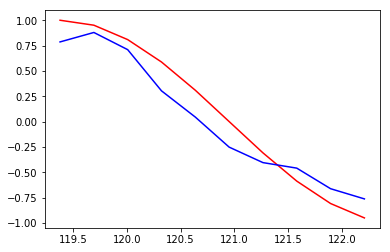

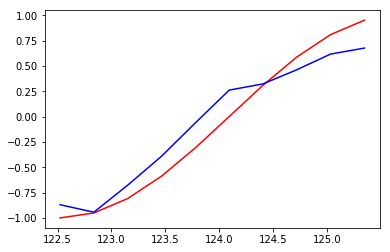

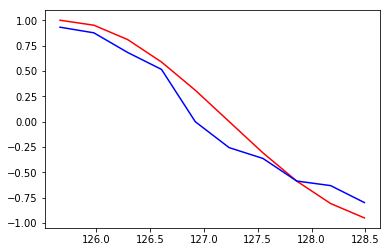

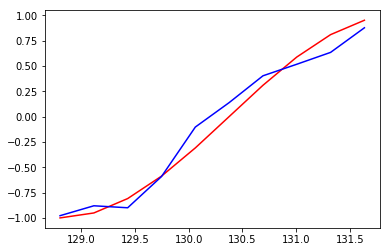

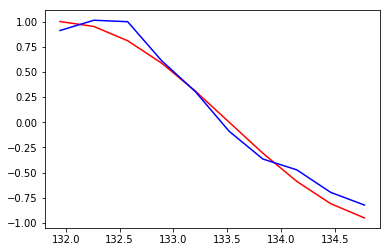

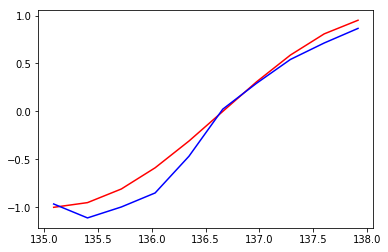

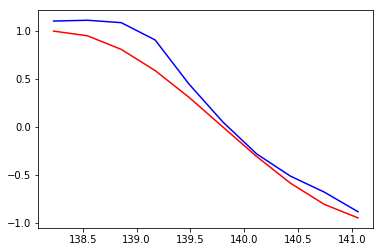

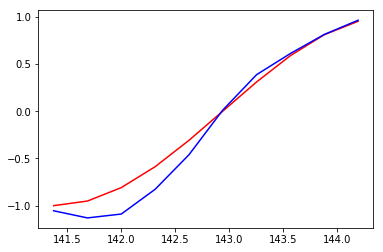

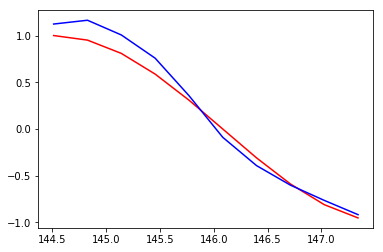

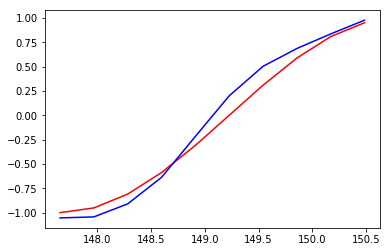

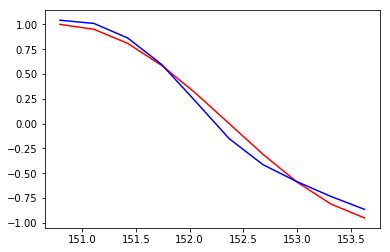

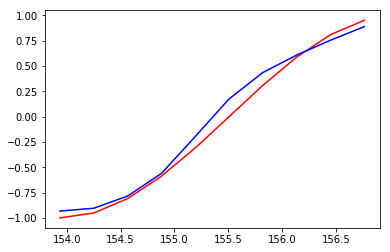

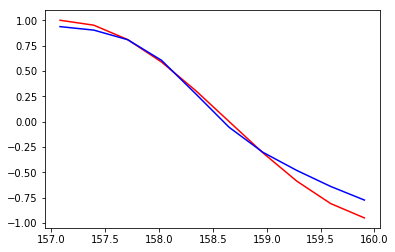

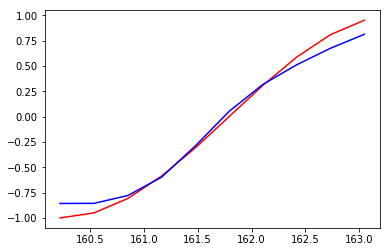

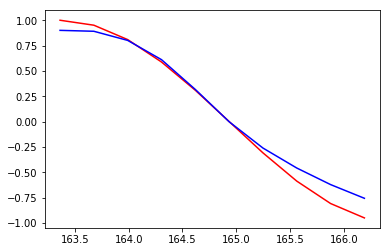

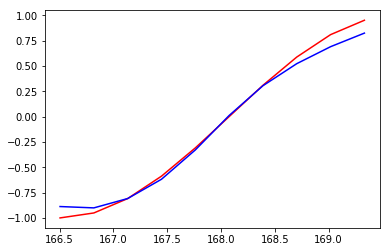

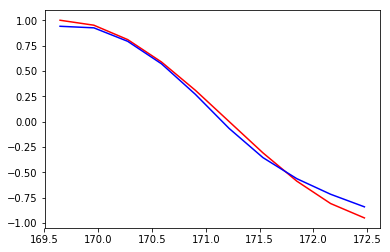

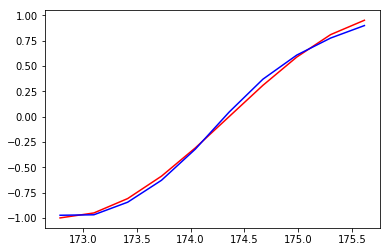

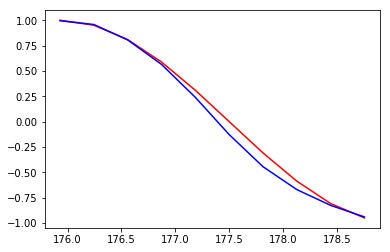

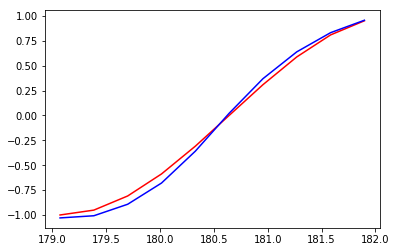

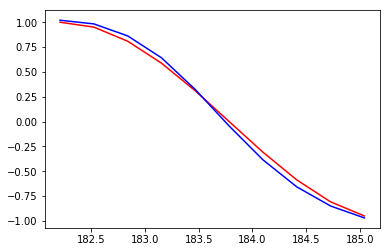

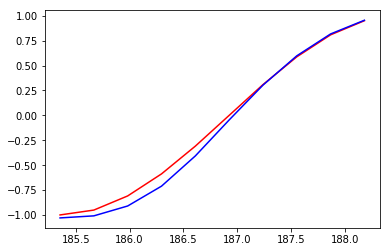

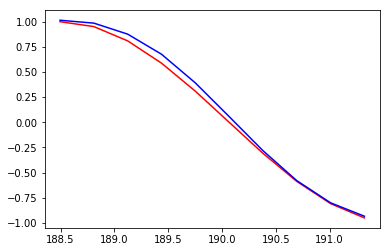

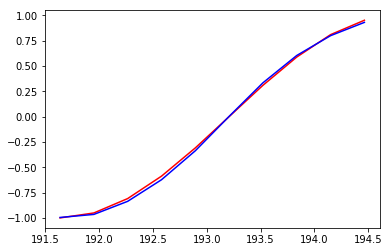

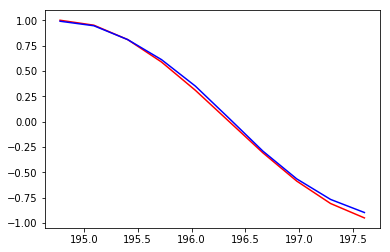

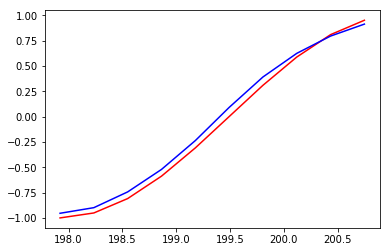

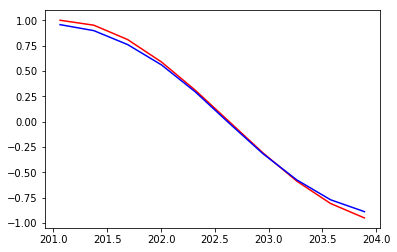

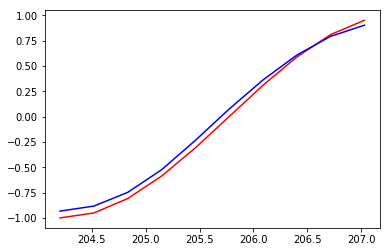

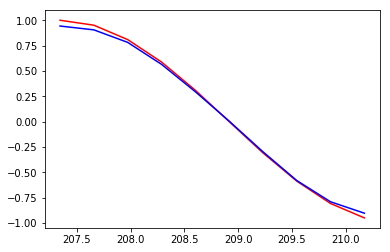

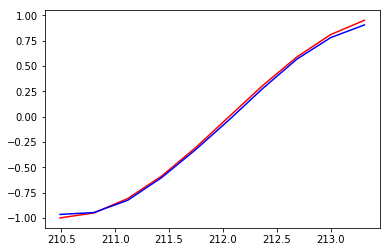

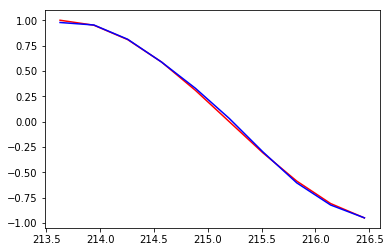

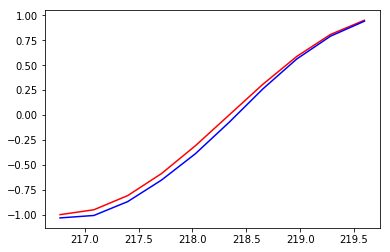

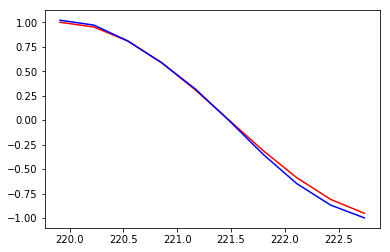

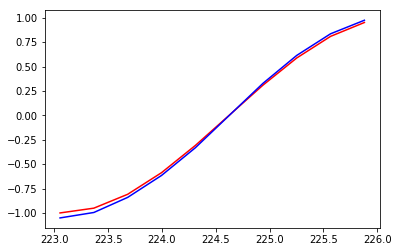

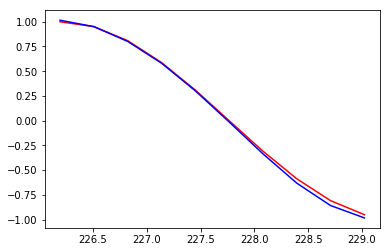

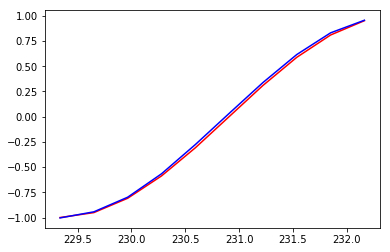

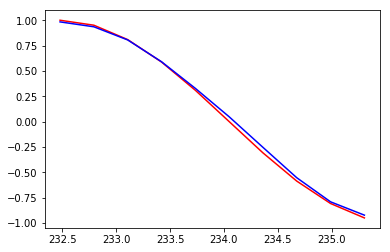

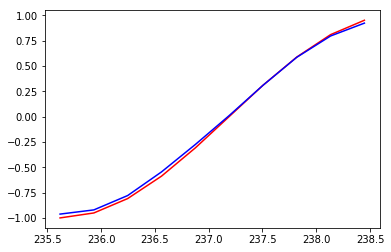

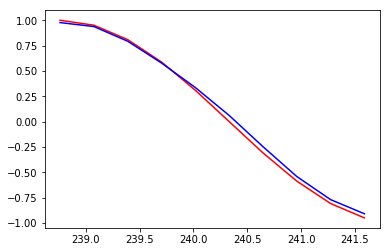

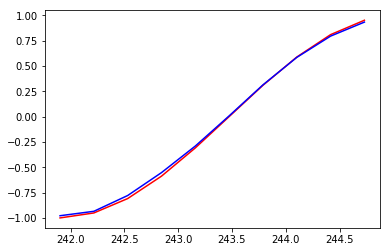

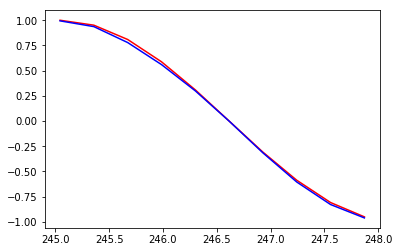

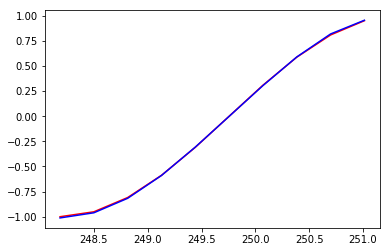

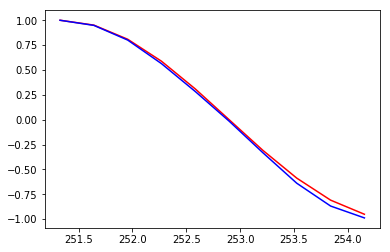

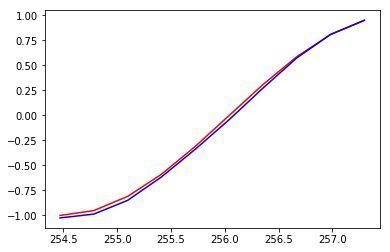

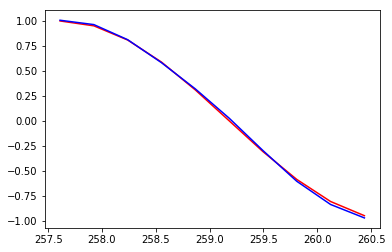

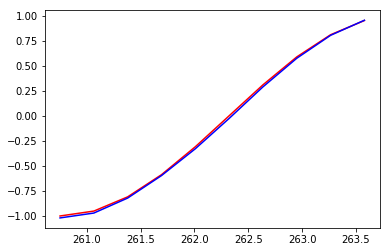

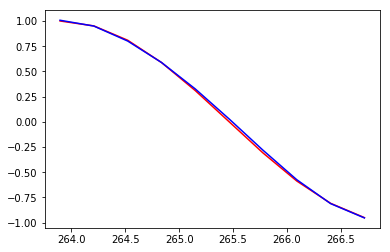

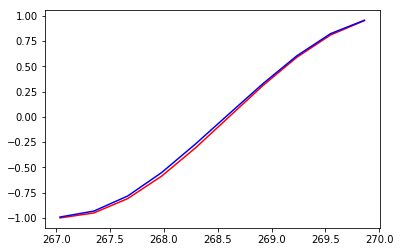

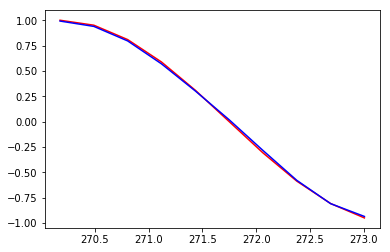

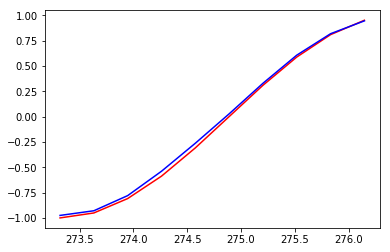

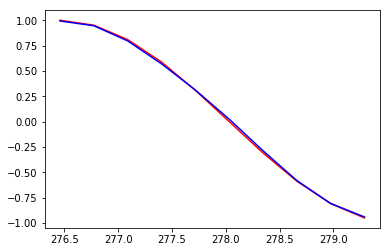

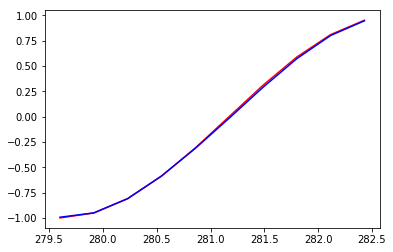

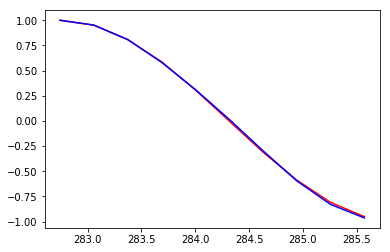

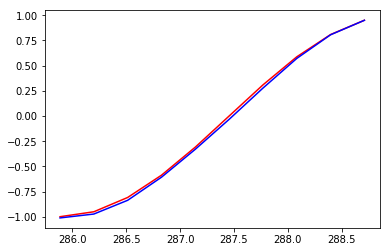

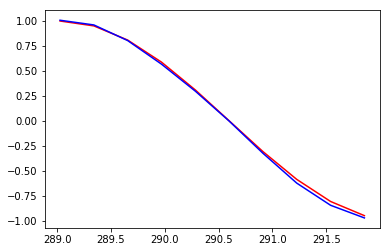

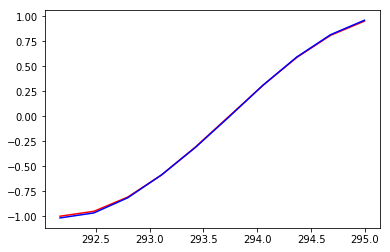

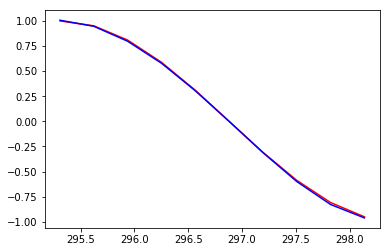

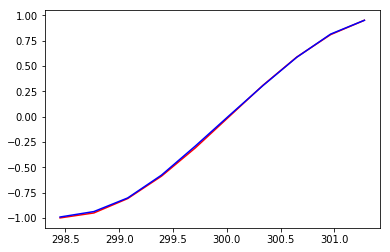

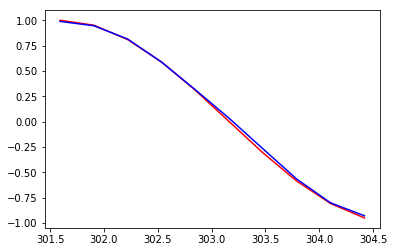

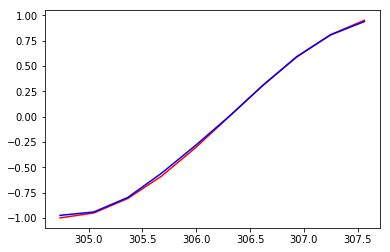

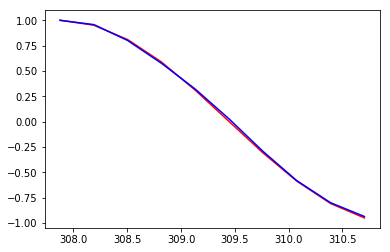

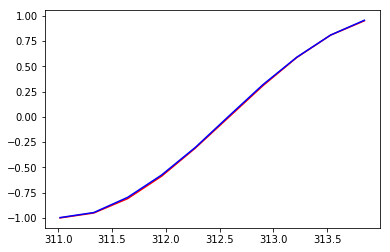

In [75]:
#RNN回归
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

TIME_STEP=10  #RNN time step
INPUT_SIZE=1  #RNN input size
LR=0.02

steps=np.linspace(0,np.pi*2,100,dtype=np.float32)
x_np=np.sin(steps)
y_np=np.cos(steps)
plt.plot(steps,y_np,'r-',label='target(cos)')
plt.plot(steps,x_np,'b-',label='input(sin)')
plt.legend(loc='best')
plt.show()

class RNN(nn.Module):
    def __init__(self):
        super(RNN,self).__init__()
        
        self.rnn=nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=32,
            num_layers=1,
            batch_first=True
        )
        self.out=nn.Linear(32,1)
        
    def forward(self,x,h_state):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, hidden_size)
        r_out,h_state=self.rnn(x,h_state)
        
        outs=[]#保存所有的预测
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:,time_step,:]))
        return torch.stack(outs,dim=1),h_state#把list转换为tensor,合并在一起，保留r_out
         # instead, for simplicity, you can replace above codes by follows
        # r_out = r_out.view(-1, 32)
        # outs = self.out(r_out)
        # outs = outs.view(-1, TIME_STEP, 1)
        # return outs, h_state
        
        # or even simpler, since nn.Linear can accept inputs of any dimension 
        # and returns outputs with same dimension except for the last
        # outs = self.out(r_out)
        # return outs

rnn=RNN()
print(rnn)

optimizer=torch.optim.Adam(rnn.parameters(),lr=LR)
loss_func=nn.MSELoss()

h_state=None #初始化

plt.figure(1, figsize=(12, 5))
plt.ion() 

for step in range(100):
    start,end=step*np.pi,(step+1)*np.pi
    steps=np.linspace(start,end,TIME_STEP,dtype=np.float32,endpoint=False)
    x_np=np.sin(steps)
    y_np=np.cos(steps)
    
    x=Variable(torch.from_numpy(x_np[np.newaxis,:,np.newaxis]))
    y=Variable(torch.from_numpy(y_np[np.newaxis,:,np.newaxis]))
    
    prediction,h_state=rnn(x,h_state)
    h_state=Variable(h_state)#!!important
    
    loss = loss_func(prediction, y)         # calculate loss
    optimizer.zero_grad()                   # clear gradients for this training step
    loss.backward()                         # backpropagation, compute gradients
    optimizer.step()                        # apply gradients

    # plotting
    plt.plot(steps, y_np.flatten(), 'r-')#flatten返回一维数组，横着展平
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw(); plt.pause(0.05)

plt.ioff()
plt.show()
    

In [100]:
a=[]
b=torch.Tensor([[1,1,1],[1,2,3]])
for i in range(b.size(1)):
    a.append(b[:,i])
    print(a)
print(b)
print(torch.stack(a,dim=1))

torch.Size([2, 3])
[tensor([1., 1.])]
[tensor([1., 1.]), tensor([1., 2.])]
[tensor([1., 1.]), tensor([1., 2.]), tensor([1., 3.])]
tensor([[1., 1., 1.],
        [1., 2., 3.]])
tensor([[1., 1., 1.],
        [1., 2., 3.]])


D:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])


D:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


torch.Size([60000])


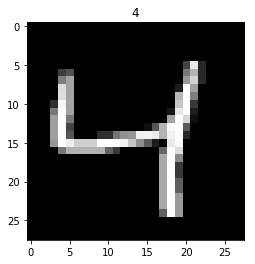

Epoch:  0 | train loss: 0.2329


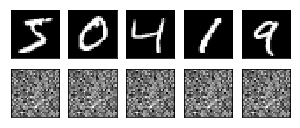

Epoch:  0 | train loss: 0.0693


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0597


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0555


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0564


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0481


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0516


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0514


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0494


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0483


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0446


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0407


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0428


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0397


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0414


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0421


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0439


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0407


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0395


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0390


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0416


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0445


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0377


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0425


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0364


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0369


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0344


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0420


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0398


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0368


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0387


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0339


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0373


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0399


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0396


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0361


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0414


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0375


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0415


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0353


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0375


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0379


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0379


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0363


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0397


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0345


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0349


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0371


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0373


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0370


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0395


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0353


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0346


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0394


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0357


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0351


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0382


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0377


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0383


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0327


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0443


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0363


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0426


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0364


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0329


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0326


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0335


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0370


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0371


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0362


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0370


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0345


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0346


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0345


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0327


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0369


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0374


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0462


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0343


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0387


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0380


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0372


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0421


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0335


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0385


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0324


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0373


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0367


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0320


<Figure size 432x288 with 0 Axes>

In [ ]:
#Autocoder自编码 无监督学习
import torch 
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

EPOCH=10
BATCH_SIZE=64
LR=0.005
DOWNLOAD_MNIST=False
N_TEST_IMG=5

train_data=torchvision.datasets.MNIST(
    root='./mnist',train=True,transform=torchvision.transforms.ToTensor(),download=DOWNLOAD_MNIST
                                     )
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[2].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[2])
plt.show()

class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder,self).__init__()
        
        self.encoder=nn.Sequential(
            nn.Linear(28*28,128),
            nn.Tanh(),
            nn.Linear(128,64),
            nn.Tanh(),
            nn.Linear(64,12),
            nn.Tanh(),
            nn.Linear(12,3) #压缩为3个feature，相当于压缩到3维
        )
        self.decoder=nn.Sequential(
            nn.Linear(3,12),
            nn.Tanh(),
            nn.Linear(12,64),
            nn.Tanh(),
            nn.Linear(64,128),
            nn.Tanh(),
            nn.Linear(128,28*28),
            nn.Sigmoid()#上面loader里面的值都在0,1之间，所以用sigmoid改变值
        )
    def forward(self,x):
        encoded=self.encoder(x)
        decoded=self.decoder(encoded)
        return encoded,decoded

autoencoder=AutoEncoder()

optimizer=torch.optim.Adam(autoencoder.parameters(),lr=LR)
loss_func=nn.MSELoss()

# initialize figure
f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
plt.ion()   # continuously plot
# original data (first row) for viewing
view_data = train_data.train_data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.
for i in range(N_TEST_IMG):
    a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray'); a[0][i].set_xticks(()); a[0][i].set_yticks(())

for epoch in range(EPOCH):
    for step ,(x,b_label)in enumerate(train_loader):
        b_x=Variable(x.view(-1,28*28))
        b_y=Variable(x.view(-1,28*28))
        
        
        encoded,decoded=autoencoder(b_x)
        
        loss=loss_func(decoded,b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step%100==0:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy())

            # plotting decoded image (second row)
            _, decoded_data = autoencoder(view_data)
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.draw(); plt.pause(0.05)

plt.ioff()
plt.show()



RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)
10


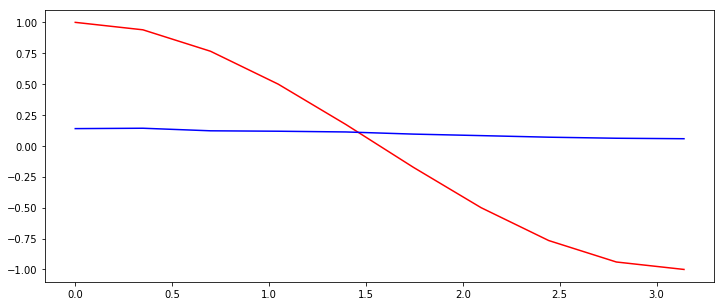

20


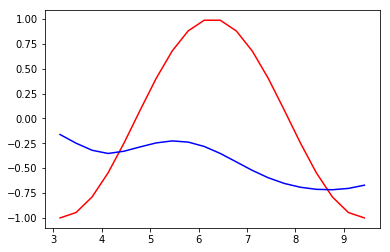

30


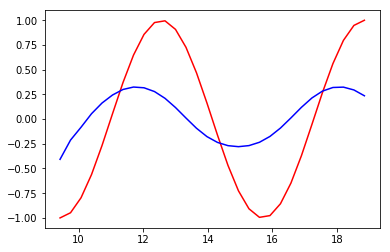

30


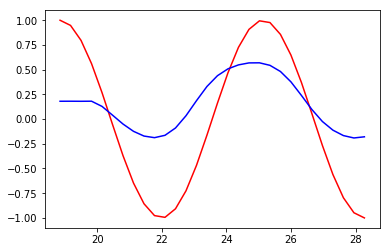

30


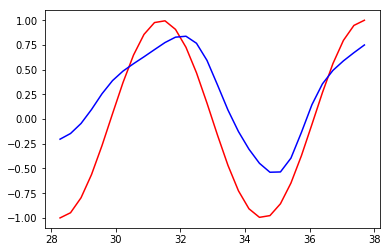

10


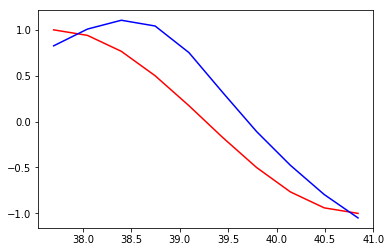

20


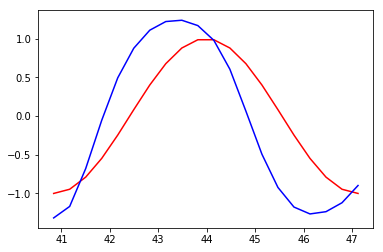

10


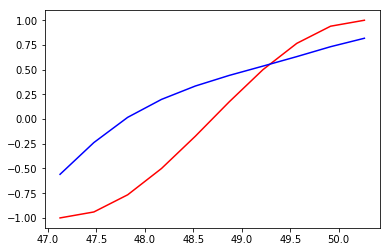

10


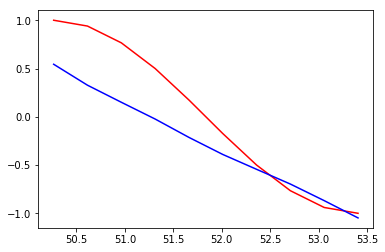

30


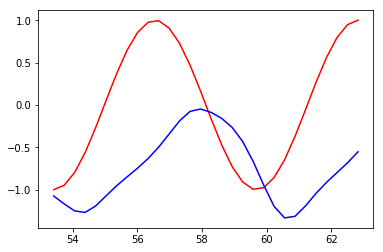

10


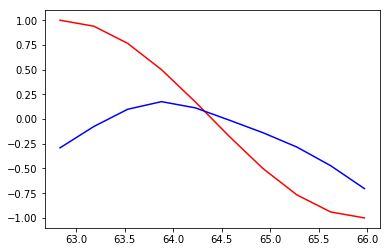

10


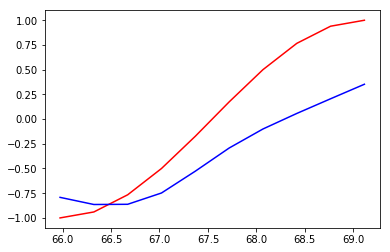

20


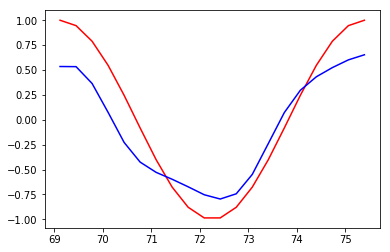

10


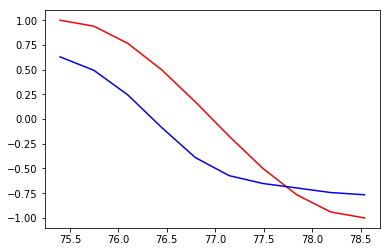

20


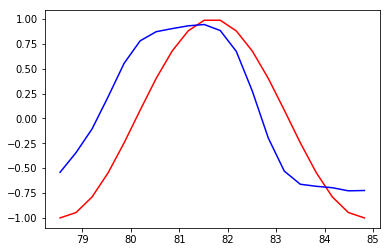

10


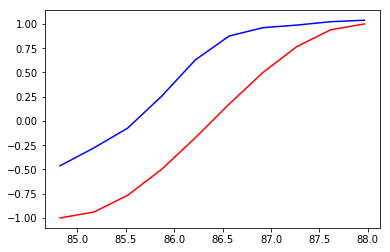

30


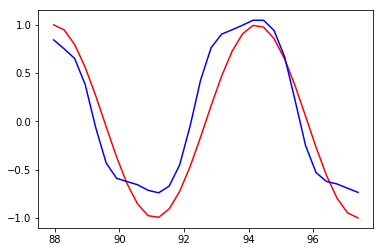

20


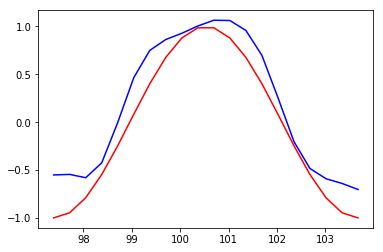

30


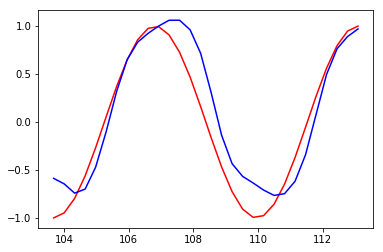

20


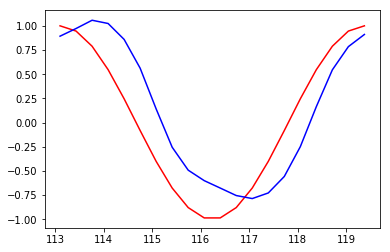

30


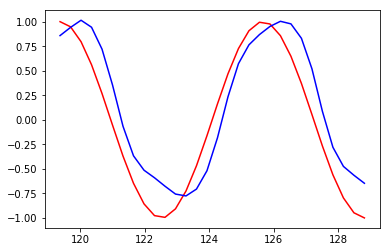

20


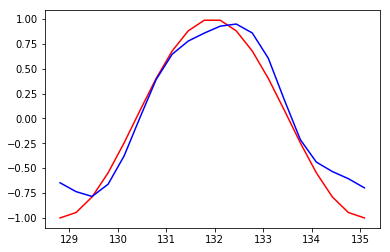

10


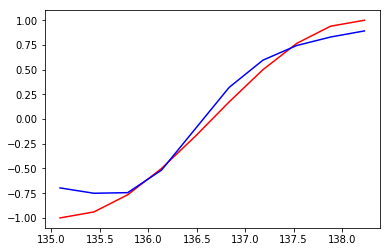

30


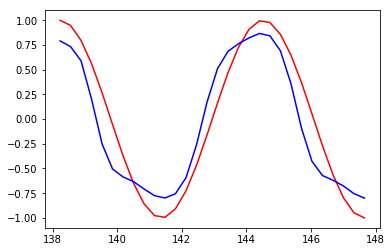

10


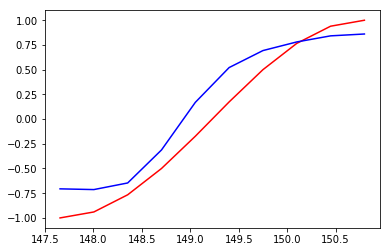

20


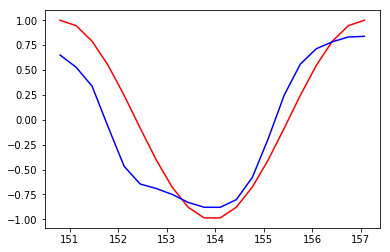

10


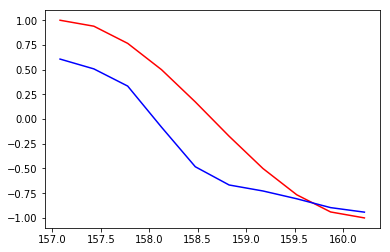

30


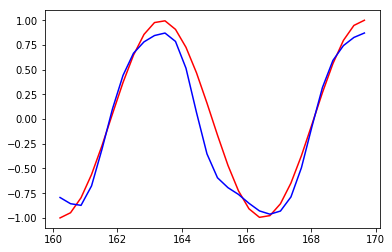

30


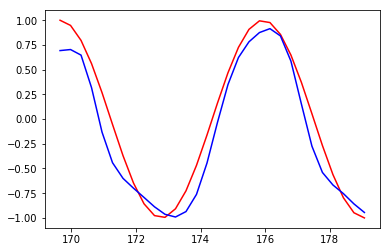

30


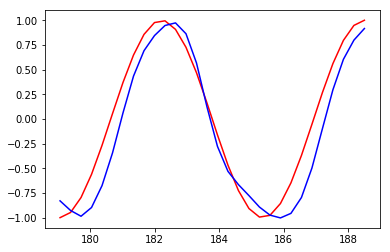

20


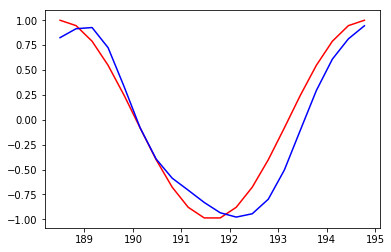

30


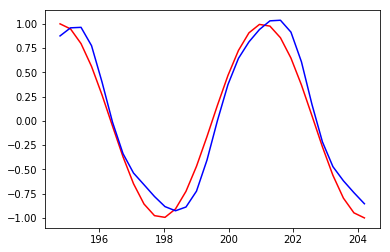

10


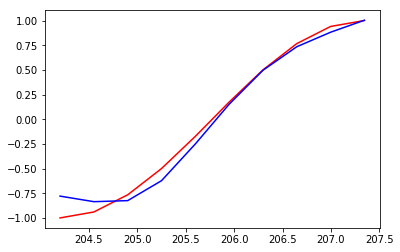

30


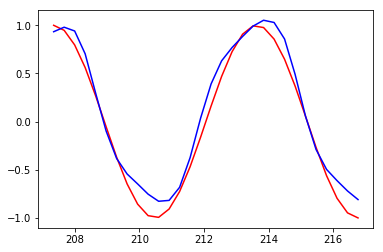

30


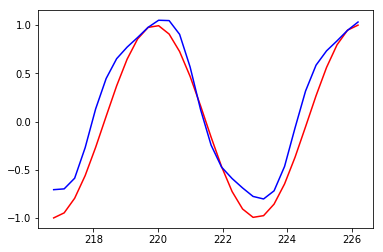

10


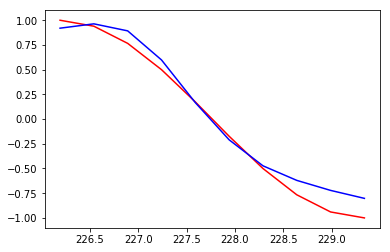

10


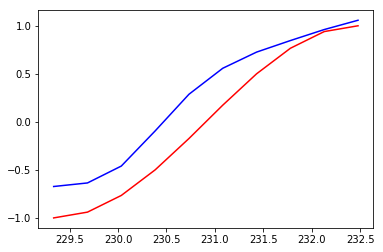

30


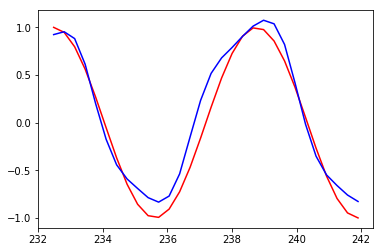

20


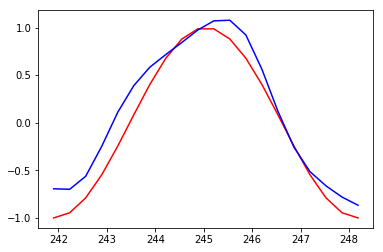

30


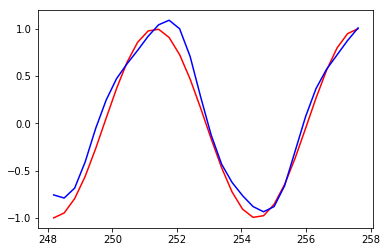

20


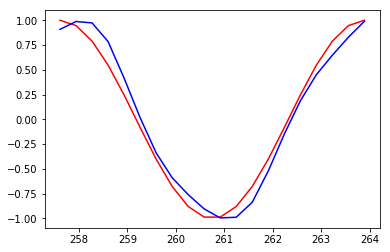

10


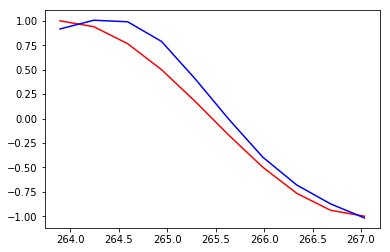

20


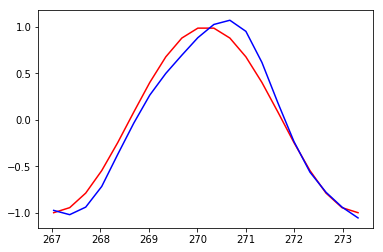

10


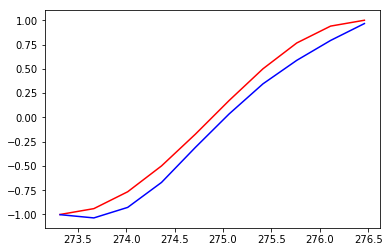

20


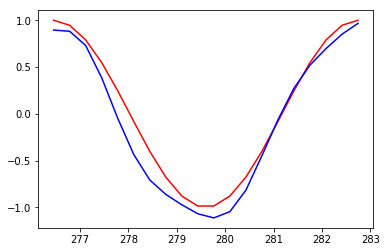

10


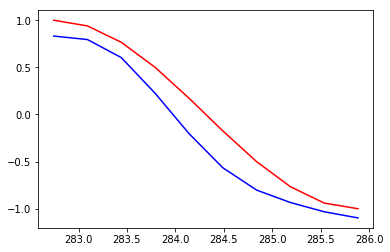

30


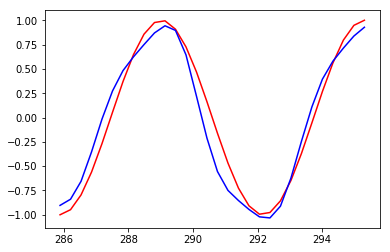

10


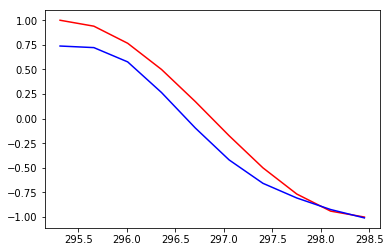

20


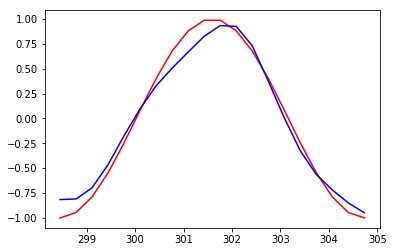

10


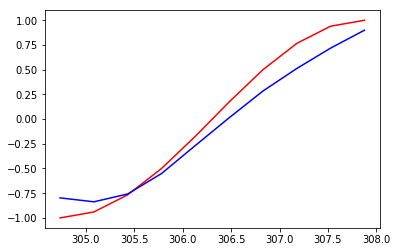

10


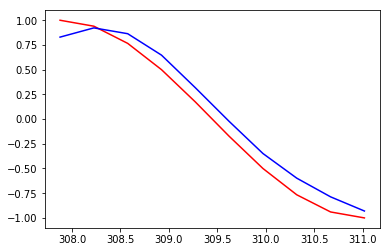

10


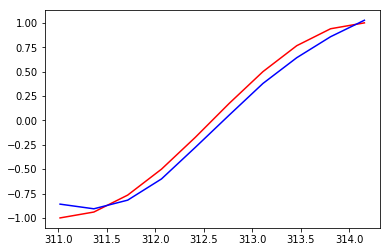

20


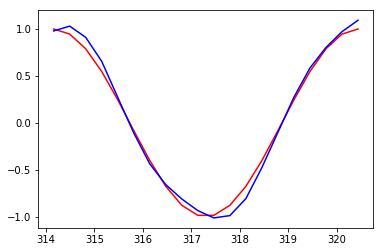

30


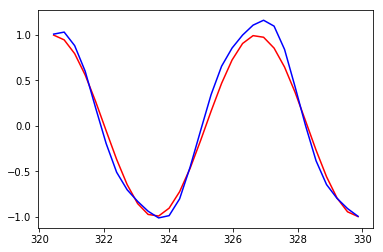

10


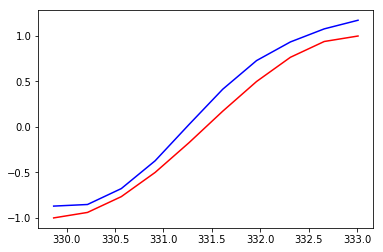

10


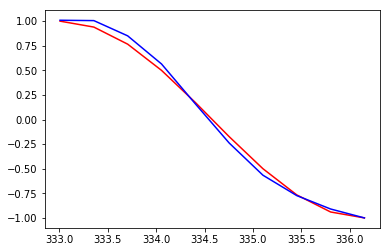

30


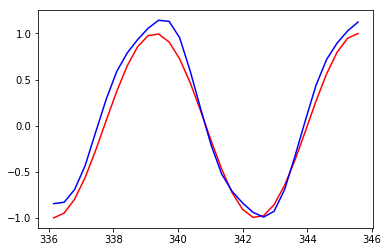

30


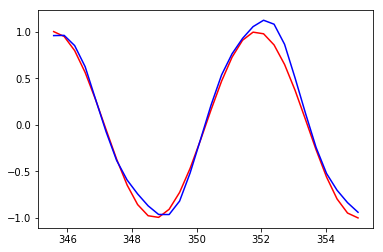

10


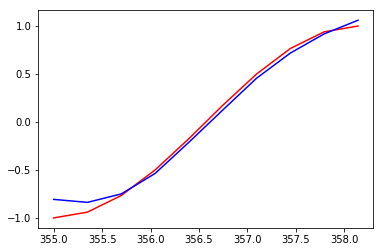

30


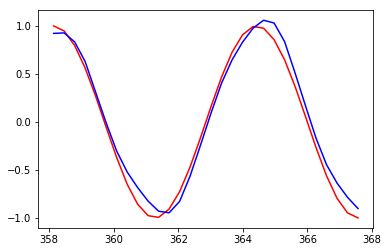

In [12]:
#动态
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt

INPUT_SIZE=1
LR=0.02

class RNN(nn.Module):
    def __init__(self):
        super(RNN,self).__init__()
        
        self.rnn=nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=32,
            num_layers=1,
            batch_first=True
        )
        self.out=nn.Linear(32,1)
    
    def forward(self,x,h_state):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, output_size)
        r_out,h_state=self.rnn(x,h_state)
        
        outs=[]
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:,time_step,:]))
        return torch.stack(outs,dim=1),h_state
        
        
rnn=RNN()
print(rnn)

optimizer=torch.optim.Adam(rnn.parameters(),lr=LR)
loss_func=nn.MSELoss()

h_state=None

plt.figure(1, figsize=(12, 5))
plt.ion()

step=0
for i in range(60):
    dynamic_steps=np.random.randint(1,4)
    start,end=step*np.pi,(step+dynamic_steps)*np.pi
    step+=dynamic_steps
    
    steps=np.linspace(start,end,10*dynamic_steps,dtype=np.float32)
    
    print(len(steps))
    
    x_np=np.sin(steps)
    y_np=np.cos(steps)
    x=Variable(torch.from_numpy(x_np[np.newaxis,:,np.newaxis]))
    y=Variable(torch.from_numpy(y_np[np.newaxis,:,np.newaxis]))
    
    prediction,h_state=rnn(x,h_state)
    h_state=Variable(h_state)
    
    loss=loss_func(prediction,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw()
    plt.pause(0.05)

plt.ioff()
plt.show()  
    

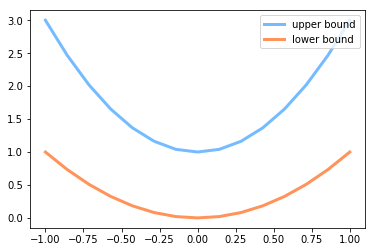

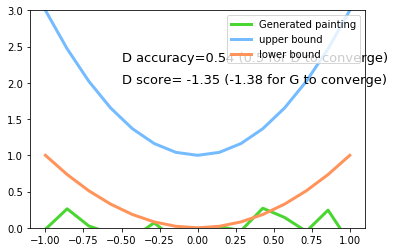

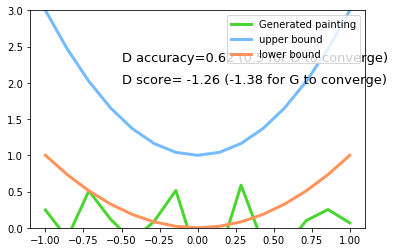

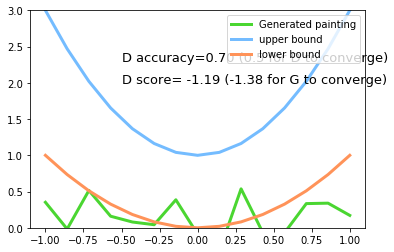

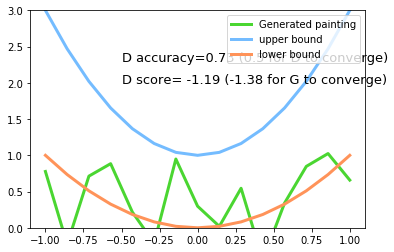

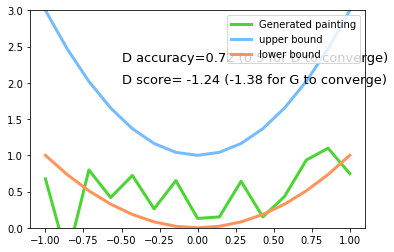

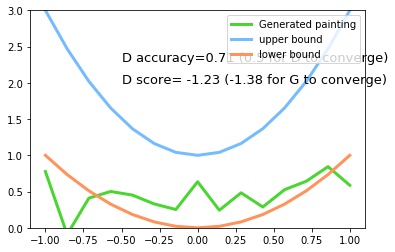

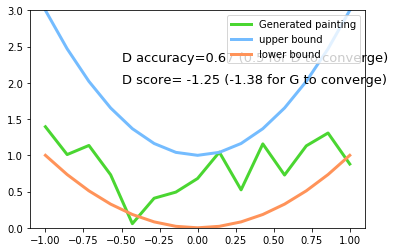

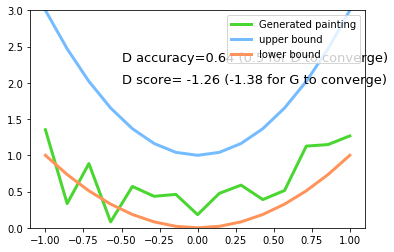

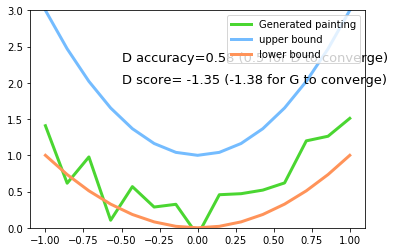

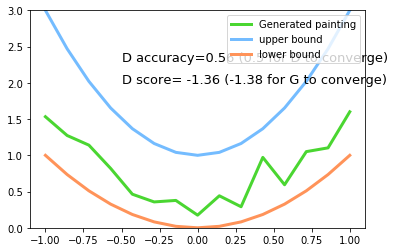

In [ ]:
#GAN
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

BATCH_SIZE=64
LR_G=0.0001             #generator生成器
LR_D=0.0001             #discriminater判别器
N_IDEAS=5               #think of this as number of ideas for generating an art work
ART_COMPONENTS=15       #相当于一张画的总点数（这些点组成一幅画）
PAINT_POINTS=np.vstack([np.linspace(-1,1,ART_COMPONENTS)for _ in range(BATCH_SIZE)])

plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
plt.legend(loc='upper right')
plt.show()

def artist_works():
    a=np.random.uniform(1,2,size=BATCH_SIZE)[:,np.newaxis]
    paintings=a*np.power(PAINT_POINTS,2)+(a-1)
    paintings=torch.from_numpy(paintings).float()
    return paintings

G=nn.Sequential(
    nn.Linear(N_IDEAS,128),
    nn.ReLU(),
    nn.Linear(128,ART_COMPONENTS)
)#用5个idead画一幅画

D=nn.Sequential(
    nn.Linear(ART_COMPONENTS,128),
    nn.ReLU(),
    nn.Linear(128,1),
    nn.Sigmoid()
)#输入一幅画，判断是好作品的概率

opt_D=torch.optim.Adam(D.parameters(),lr=LR_D)
opt_G=torch.optim.Adam(G.parameters(),lr=LR_G)

plt.ion()

for step in range(10000):
    artist_paintings=artist_works()
    G_ideas=torch.randn(BATCH_SIZE,N_IDEAS)#矩阵，NIDEAS列,表示random ideas
    G_paintings=G(G_ideas)
    
    prob_artist0=D(artist_paintings)#artist_paintings是好作品的概率
    prob_artist1=D(G_paintings)#G作品是好作品的概率
    
    D_loss=-torch.mean(torch.log(prob_artist0)+torch.log(1-prob_artist1))
    #增加0的概率，减小1的概率，使D判断更准
    G_loss=torch.mean(torch.log(1-prob_artist1))
    #增加1的概率，使G生成更好的作品
    
    opt_D.zero_grad()
    D_loss.backward(retain_graph=True)#保留参数给下一个反向传播
    opt_D.step()
    
    opt_G.zero_grad()
    G_loss.backward()
    opt_G.step()
    
    if step % 50 == 0:  # plotting
        plt.cla()
        plt.plot(PAINT_POINTS[0], G_paintings.data.numpy()[0], c='#4AD631', lw=3, label='Generated painting',)
        plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
        plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
        plt.text(-.5, 2.3, 'D accuracy=%.2f (0.5 for D to converge)' % prob_artist0.data.numpy().mean(), fontdict={'size': 13})
        plt.text(-.5, 2, 'D score= %.2f (-1.38 for G to converge)' % -D_loss.data.numpy(), fontdict={'size': 13})
        plt.ylim((0, 3));plt.legend(loc='upper right', fontsize=10);plt.draw();plt.pause(0.01)

plt.ioff()
plt.show()

In [28]:
#GPU CUDA加速
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
from torch.autograd import Variable

EPOCH=1
BATCH_SIZE=50
LR=0.001
DOWNLOAD_MNIST=False

train_data=torchvision.datasets.MNIST(root='./mnist',train=True,transform=torchvision.transforms.ToTensor(),download=DOWNLOAD_MNIST)
train_loader=Data.DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)

test_data=torchvision.datasets.MNIST(root='./mnist',train=False)

#here  cuda()
test_x=Variable(torch.unsqueeze(test_data.test_data,dim=1)).type(torch.FloatTensor)[:2000].cuda()/255
test_y=test_data.test_labels[:2000].cuda()

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1=nn.Sequential(
            nn.Conv2d(in_channels=1,
                     out_channels=16,
                     kernel_size=5,
                     stride=1,
                     padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
                    )
        self.conv2=nn.Sequential(nn.Conv2d(16,32,5,1,2),nn.ReLU(),nn.MaxPool2d(2))
        self.out=nn.Linear(32*7*7,10)
        
    def forward(self,x):
            x=self.conv1(x)
            x=self.conv2(x)
            x=x.view(x.size(0),-1)
            output=self.out(x)
            return output

cnn=CNN()
#here cuda()
cnn.cuda()

optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):

        # !!!!!!!! Change in here !!!!!!!!! #
        b_x = Variable(x).cuda()   # Tensor on GPU
        b_y = Variable(y).cuda()  # Tensor on GPU

        output = cnn(b_x)
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if step % 50 == 0:
            test_output = cnn(test_x)

            # !!!!!!!! Change in here !!!!!!!!! #
            pred_y = torch.max(test_output, 1)[1].cuda().data  # move the computation in GPU

            accuracy = torch.sum(pred_y == test_y).type(torch.FloatTensor) / test_y.size(0)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.cpu().numpy(), '| test accuracy: %.2f' % accuracy)


test_output = cnn(test_x[:10])

# !!!!!!!! Change in here !!!!!!!!! #
pred_y = torch.max(test_output, 1)[1].cuda().data # move the computation in GPU

print(pred_y, 'prediction number')
print(test_y[:10], 'real number')
        

D:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
D:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Epoch:  0 | train loss: 2.3225 | test accuracy: 0.12
Epoch:  0 | train loss: 0.5048 | test accuracy: 0.81
Epoch:  0 | train loss: 0.1959 | test accuracy: 0.89
Epoch:  0 | train loss: 0.2487 | test accuracy: 0.91
Epoch:  0 | train loss: 0.0639 | test accuracy: 0.94
Epoch:  0 | train loss: 0.3196 | test accuracy: 0.93
Epoch:  0 | train loss: 0.0612 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1299 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1989 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0444 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1404 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1311 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0436 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0751 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1640 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0404 | test accuracy: 0.97
Epoch:  0 | train loss: 0.4991 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0726 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1641 | test accuracy

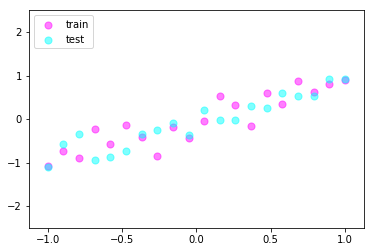

Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=300, bias=True)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): Dropout(p=0.5, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=300, out_features=300, bias=True)
  (4): Dropout(p=0.5, inplace=False)
  (5): ReLU()
  (6): Linear(in_features=300, out_features=1, bias=True)
)


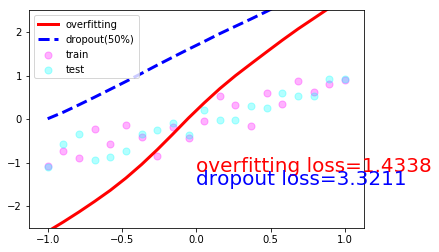

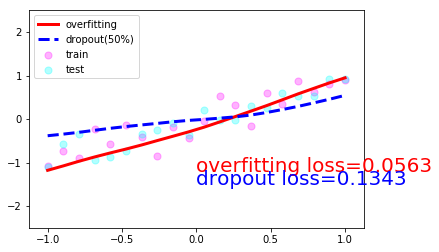

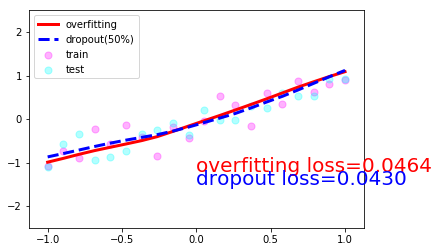

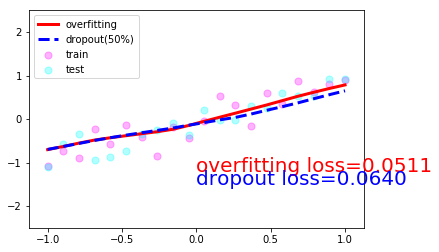

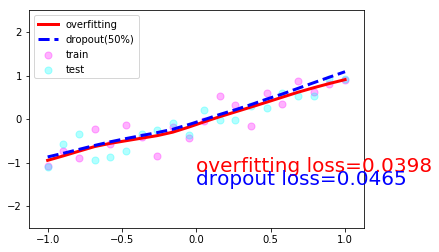

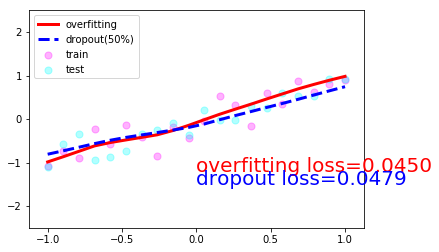

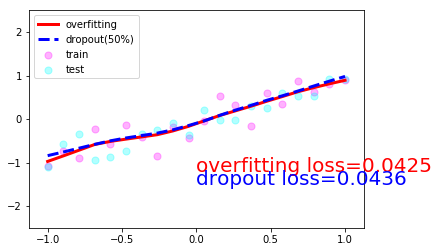

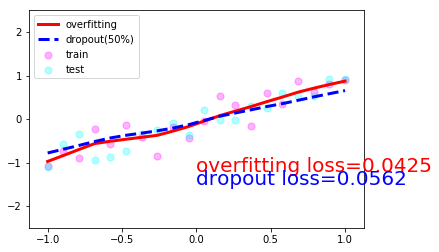

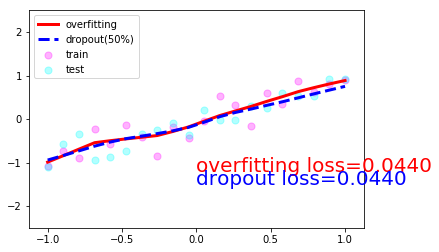

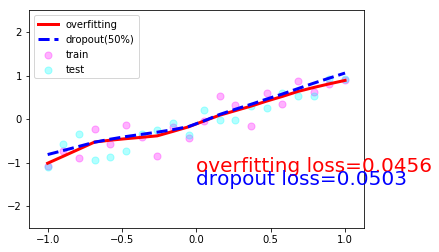

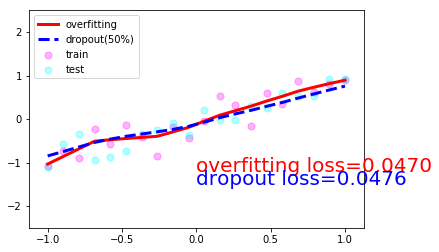

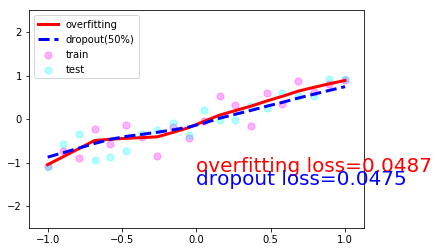

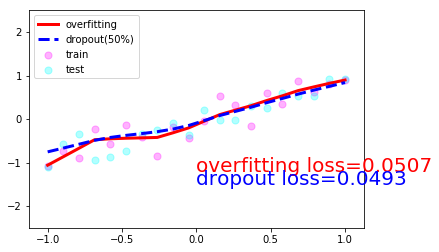

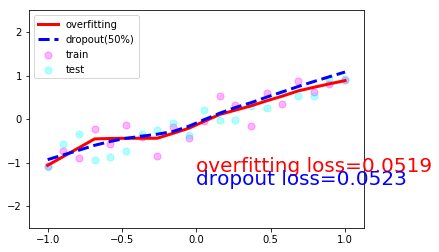

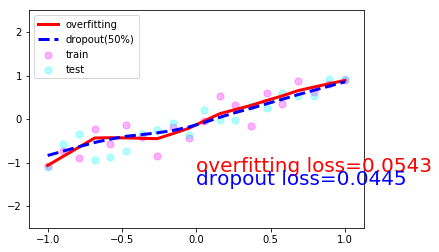

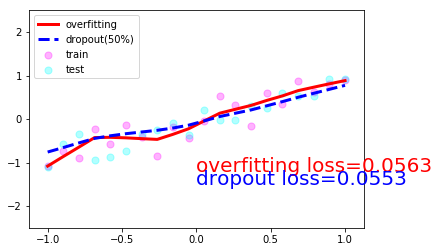

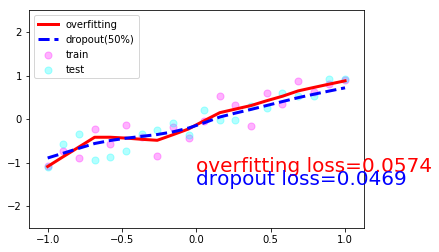

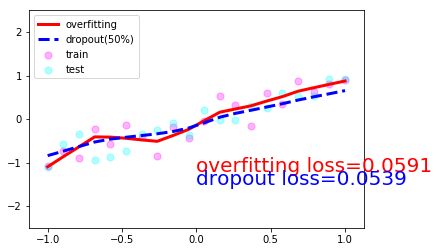

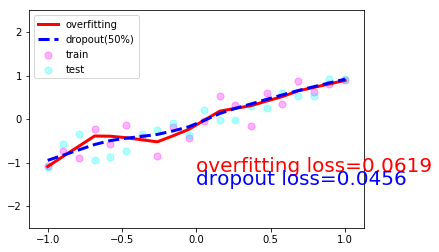

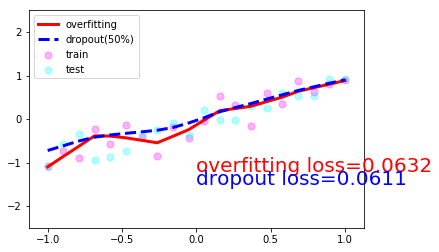

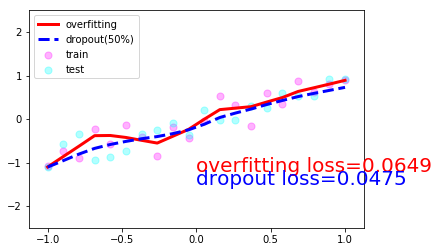

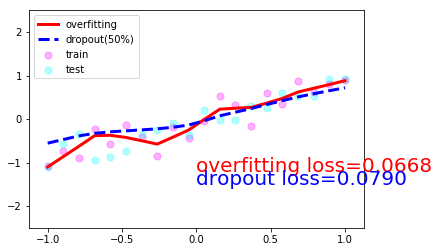

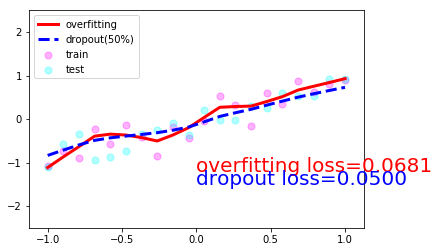

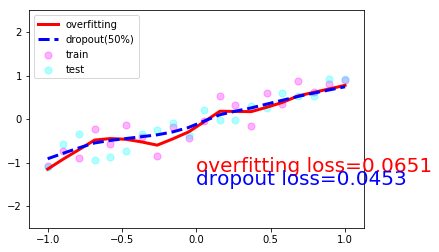

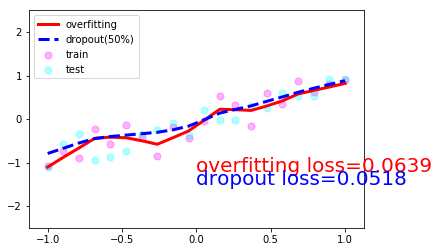

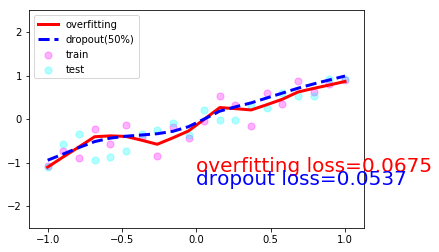

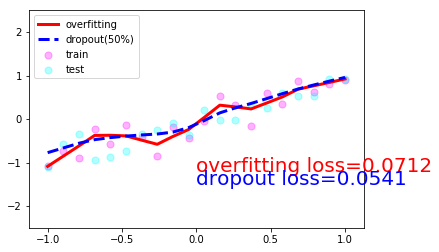

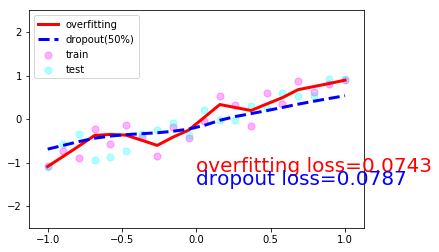

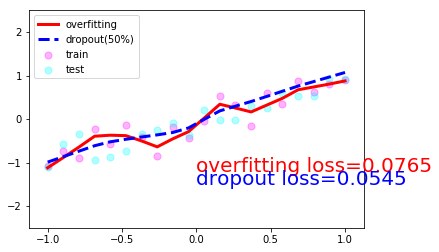

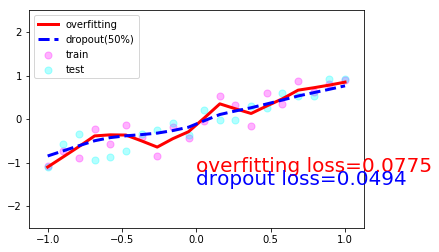

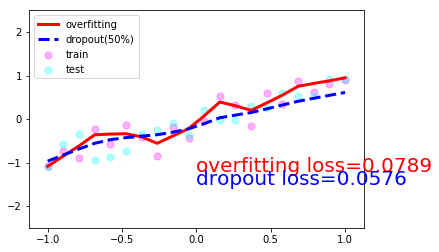

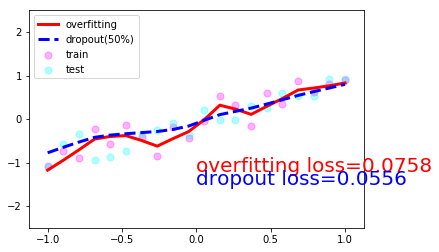

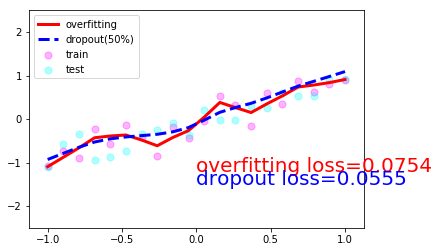

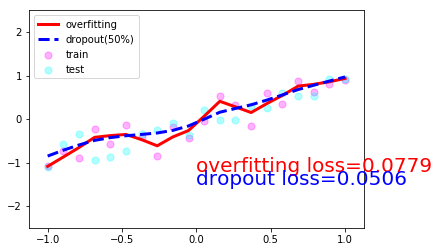

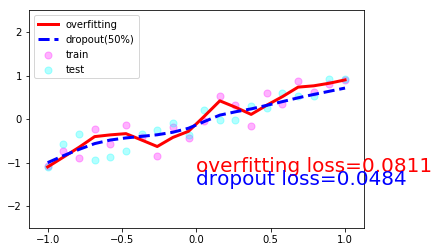

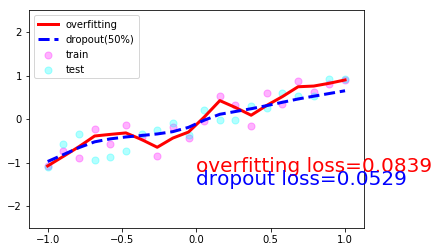

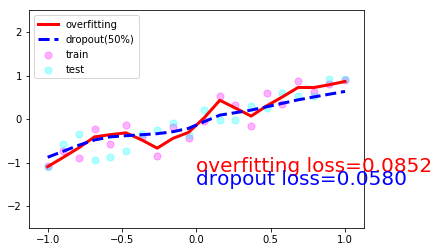

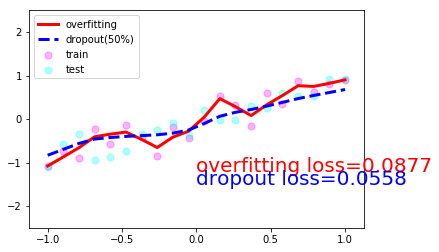

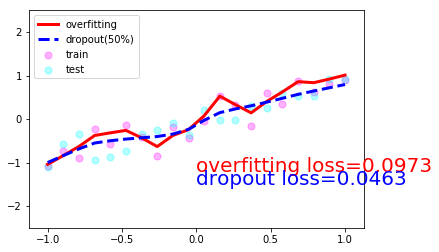

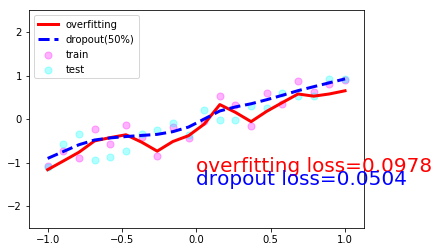

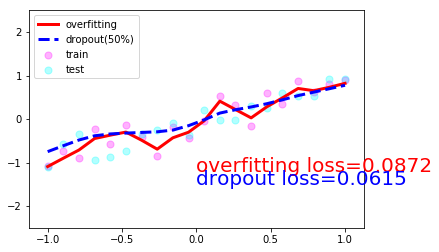

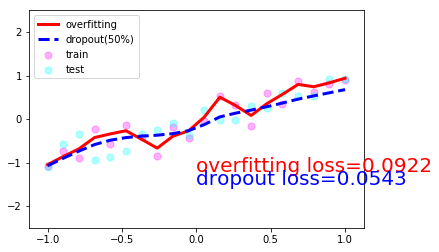

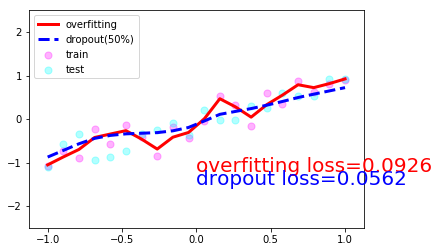

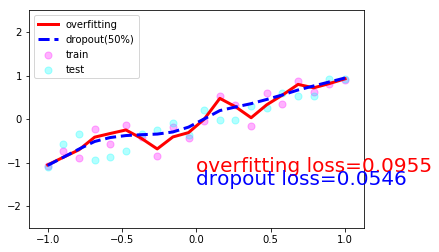

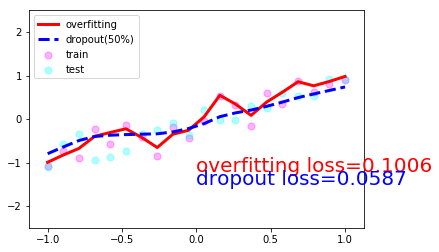

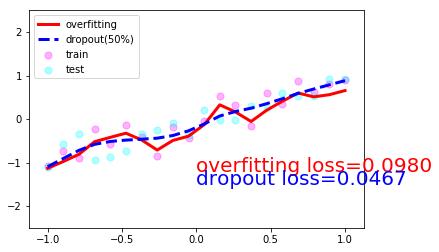

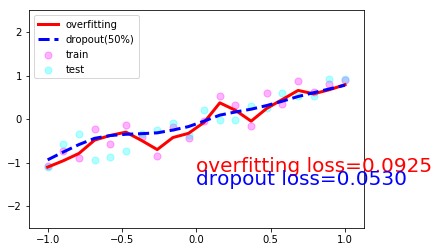

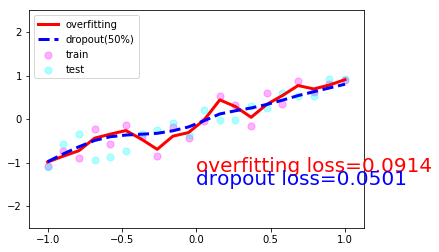

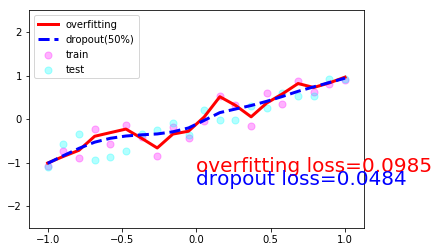

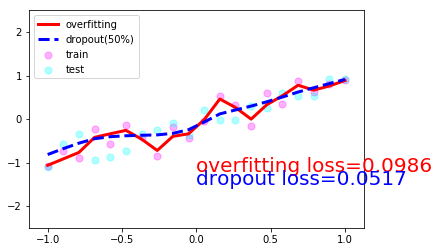

In [52]:
#Dropout改善过拟合
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

N_SAMPLES=20
N_HIDDEN=300

#training data
x=torch.unsqueeze(torch.linspace(-1,1,N_SAMPLES),1)
y=x+0.3*torch.normal(torch.zeros(N_SAMPLES,1),torch.ones(N_SAMPLES,1))#mean std
x,y=Variable(x),Variable(y)

#test data
test_x=torch.unsqueeze(torch.linspace(-1,1,N_SAMPLES),1)
test_y=test_x+0.3*torch.normal(torch.zeros(N_SAMPLES,1),torch.ones(N_SAMPLES,1))
test_x,test_y=Variable(test_x),Variable(test_y)

#show data
plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.5, label='train')
plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.5, label='test')
plt.legend(loc='upper left')
plt.ylim((-2.5, 2.5))
plt.show()

net_overfitting=torch.nn.Sequential(
    torch.nn.Linear(1,N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN,N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN,1)
)

net_dropped=torch.nn.Sequential(
    torch.nn.Linear(1,N_HIDDEN),
    torch.nn.Dropout(0.5),   #drop 50% neuron
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN,N_HIDDEN),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN,1)
)

print(net_overfitting)
print(net_dropout)

optimizer_ofit=torch.optim.Adam(net_overfitting.parameters(),lr=0.01)
optimizer_drop=torch.optim.Adam(net_dropped.parameters(),lr=0.01)
loss_func=torch.nn.MSELoss()

plt.ion()

for t in range(500):
    pred_ofit=net_overfitting(x)
    pred_drop=net_dropped(x)
    loss_ofit=loss_func(pred_ofit,y)
    loss_drop=loss_func(pred_drop,y)
    
    optimizer_ofit.zero_grad()
    optimizer_drop.zero_grad()
    loss_ofit.backward()
    loss_drop.backward()
    optimizer_ofit.step()
    optimizer_drop.step()
    
    if t%10==0:
        net_overfitting.eval()
        net_dropped.eval()     #在测试的时候屏蔽掉drop的部分。避免参数不同
        
        plt.cla()
        test_pred_ofit=net_overfitting(test_x)
        test_pred_drop=net_dropped(test_x)
        plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.3, label='train')
        plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.3, label='test')
        plt.plot(test_x.data.numpy(), test_pred_ofit.data.numpy(), 'r-', lw=3, label='overfitting')
        plt.plot(test_x.data.numpy(), test_pred_drop.data.numpy(), 'b--', lw=3, label='dropout(50%)')
        plt.text(0, -1.2, 'overfitting loss=%.4f' % loss_func(test_pred_ofit, test_y).data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.text(0, -1.5, 'dropout loss=%.4f' % loss_func(test_pred_drop, test_y).data.numpy(), fontdict={'size': 20, 'color': 'blue'})
        plt.legend(loc='upper left'); plt.ylim((-2.5, 2.5));plt.pause(0.1)

        # 训练的时候再将屏蔽掉的dropout函数还原，使两个网络参数不同。用于训练
        net_overfitting.train()
        net_dropped.train()

plt.ioff()
plt.show()